## Demo and testing notebook

This notebook runs through a lot of the features of lazychart and is also useful for me to check things during development.

### Installation

Until this is a proper package which can be installed with a pip.install, you can add the src to your sys.path so notebooks can `from lazychart import ChartMonkey`

In [1]:
import sys
sys.path.append("D:/Projects/lazychart/src")

### Object oriented vs Functional appraoch

There are two ways to use this package:

1. Object approach. You instantiate one or more instances of the ChartMonkey class and use them to create charts.

```python
# object oriented approach
from lazychart import ChartMonkey
cm = ChartMonkey()
cm.bar(data=df, x='x_col')
```

2. Functional approach. You call the package functions which are defined in the \_\_init__.py file which instantiates the ChartMonkey class in the background and passes your requests through for it to handle.

```python
# functional approach
from lazychart import bar
bar(data=df, x='x_col')
```

In general the object approach is recommendced as it allows more features.

In [2]:
from lazychart import ChartMonkey
cm = ChartMonkey()

### Generate some data

In [3]:
# object oriented approach
from example_data import example_data

df = example_data()

#df = cm.example_data(n=1461)
display(df.head())

# most charts will use this same data - so make it sticky
cm.sticky(data=df)

,date,user,age_band,mindset,sleep_hours,steps,alcohol,work_stress,nutrition,emotion,weekday,month
0,2023-07-08,user01,50-54,growth,8.42,10552,0,3.26,7.94,happy,Saturday,2023-07
1,2023-07-03,user02,40-44,fixed,7.54,8253,0,4.96,6.00,happy,Monday,2023-07
2,2023-07-05,user04,75-79,neutral,7.76,9648,0,3.68,7.85,happy,Wednesday,2023-07
3,2023-07-03,user05,65-69,neutral,7.77,9201,0,4.91,7.53,happy,Monday,2023-07
4,2023-07-09,user06,55-59,fixed,7.24,10869,0,2.42,8.82,happy,Sunday,2023-07


### Help

If your intellisense / tooltip help / signature help isn't working in the IDE, you can use raw python commands to get these (e.g. `dir(cm)` and `help(cm.bar)`).

You'll also get a logger warning with a helpful suggestion if an unexpected argument is passed:

[WARNING] lazychart.core: Unsupported argument(s): `group_sort_oops` (did you mean `group_sort`?)


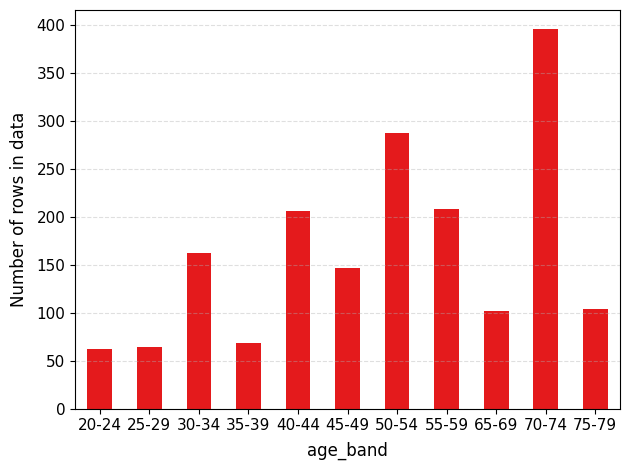

In [4]:
cm.bar(x='age_band', group_sort_oops='oops')

### Legends

My goodness it took a long time to get these working. Features:
* 'right' and 'bottom' options work similar to Google Sheets or other "plug and play" experiences
* number of rows and columns is determined dynamically to avoid legends being taller/wider than the figure
* figure size is dynamically increased, so adding many categories just results in a big figure/legend rather than a squished data chart
* long legend labels wrap automatically if on the 'right', to avoid taking up more than 30% of the figure width

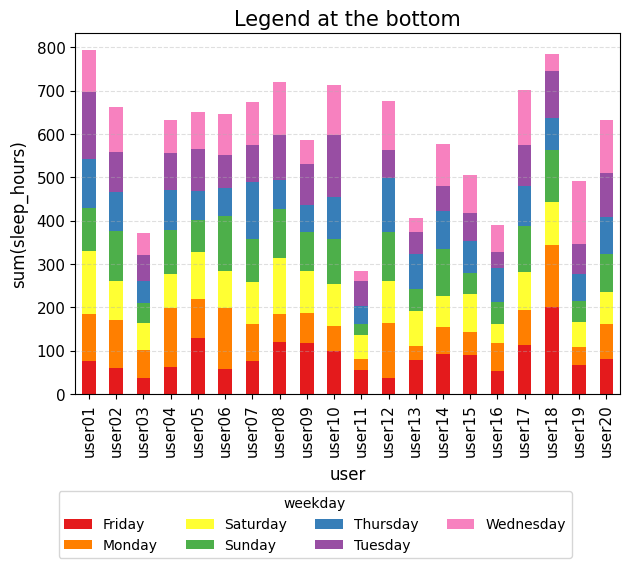

In [5]:
# legend on bottom
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend at the bottom', legend='bottom')

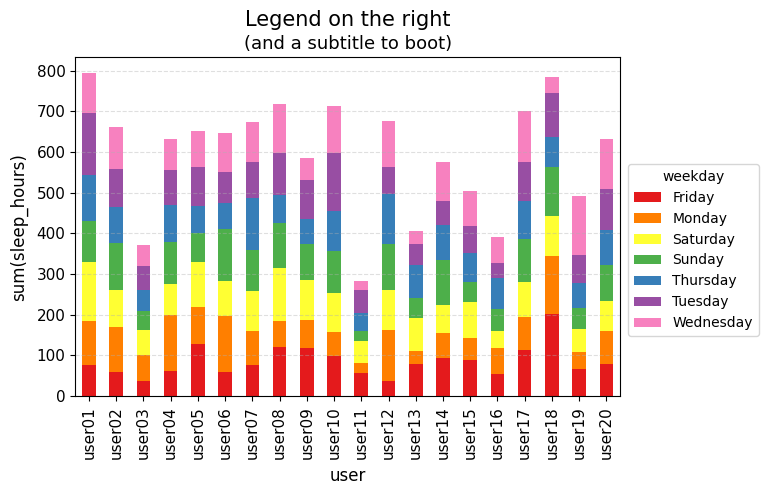

In [6]:
# legend on the right
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend on the right', legend='right', subtitle='(and a subtitle to boot)')

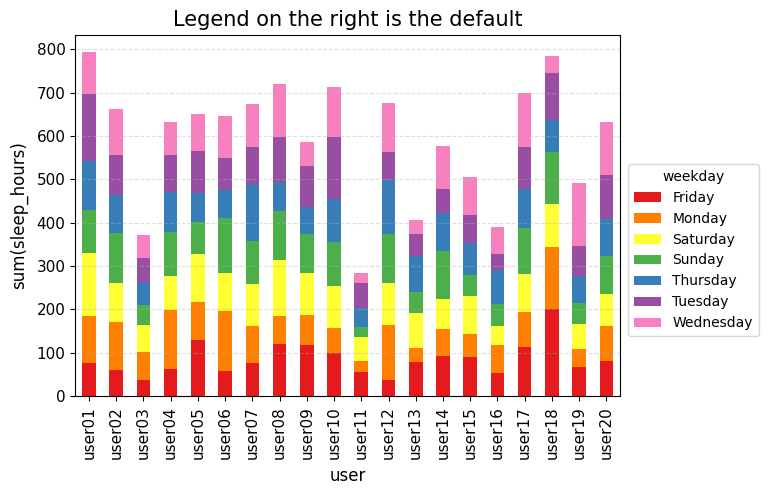

In [7]:
# this is also the default
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Legend on the right is the default')

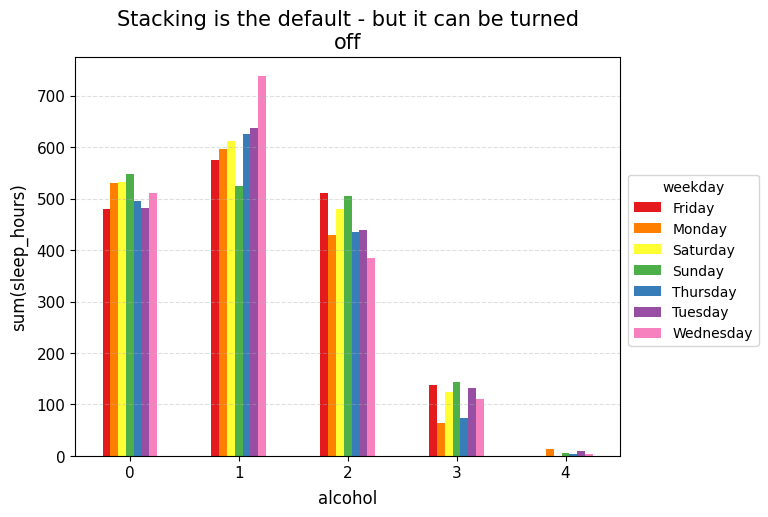

In [8]:
# stacking is also the default
cm.bar(x='alcohol', y='sleep_hours', group_by='weekday',
       title='Stacking is the default - but it can be turned off', stacking='none')

In [9]:
### Long legend labels

weekday_mapping = {
    "Monday":    "Monday is the first day",
    "Tuesday":   "Tuesday is the second day",
    "Wednesday": "Wednesday is the third day",
    "Thursday":  "Thursday is the fourth day",
    "Friday":    "Friday is the fifth day",
    "Saturday":  "Saturday is the sixth day",
    "Sunday":    "Sunday is the seventh day"
}

# Apply mapping to create longer names
df['weekday_long'] = df['weekday'].map(weekday_mapping)

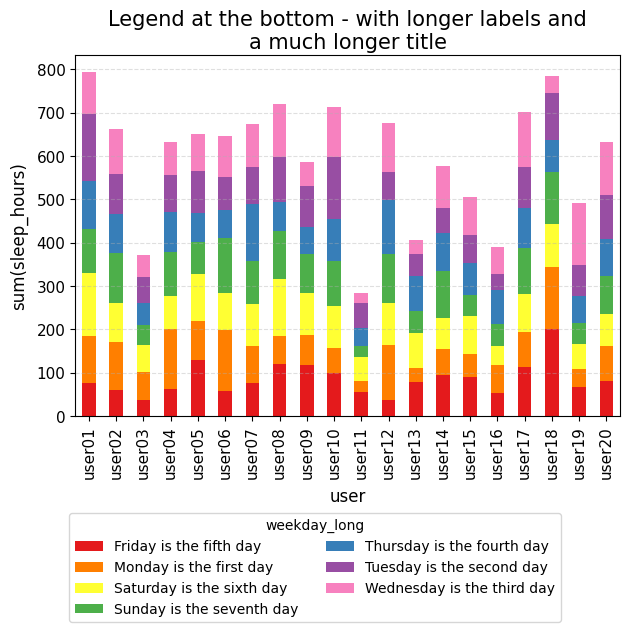

In [10]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', legend='bottom')

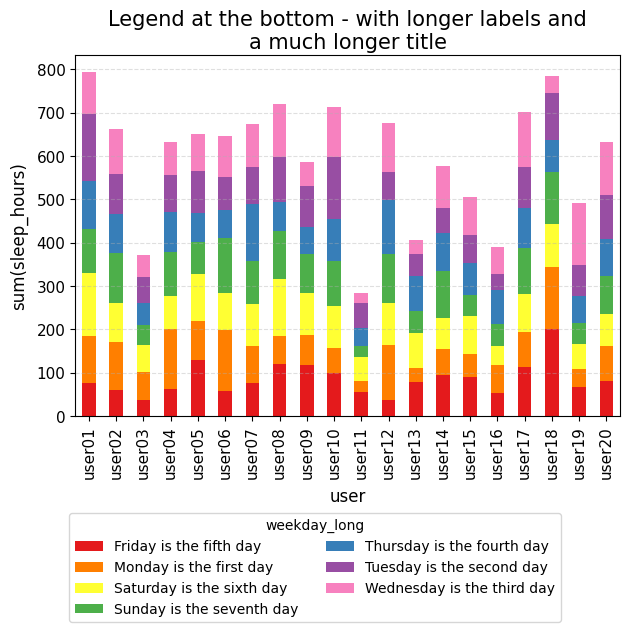

In [11]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', legend='bottom')

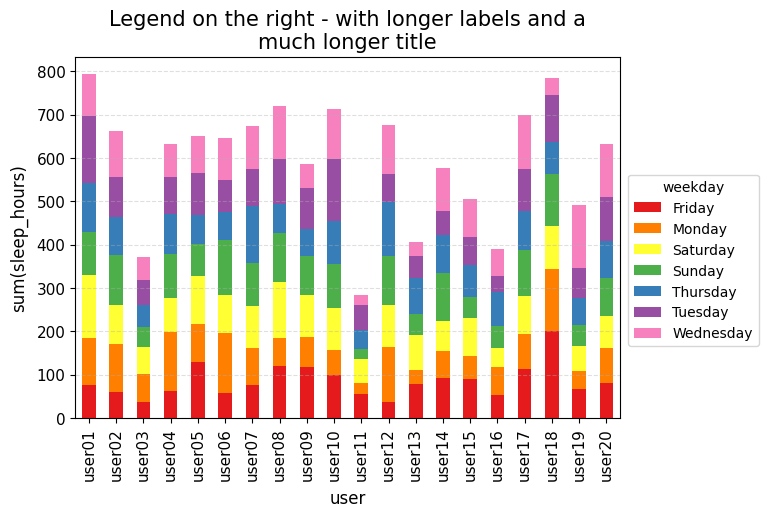

In [12]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', 
       title='Legend on the right - with longer labels and a much longer title', legend='right')

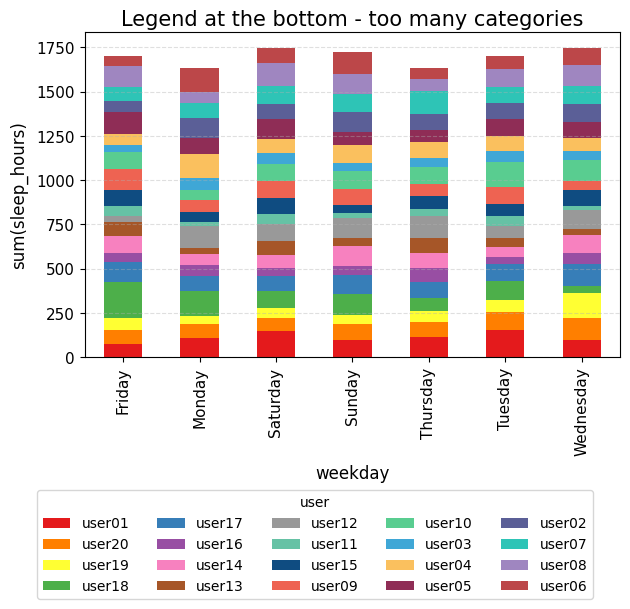

In [13]:
# legend on bottom
cm.bar(x='weekday', y='sleep_hours', group_by='user',
       title='Legend at the bottom - too many categories', legend='bottom')

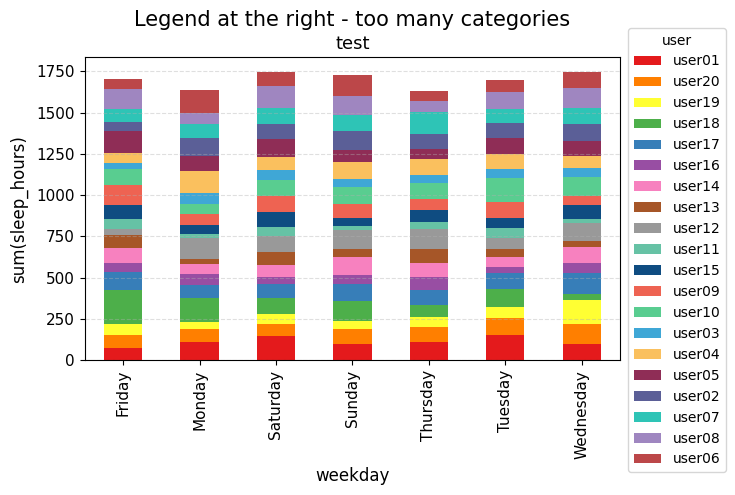

In [14]:
# legend on the right
cm.bar(x='weekday', y='sleep_hours', group_by='user', 
       title='Legend at the right - too many categories', subtitle='test', legend='right')

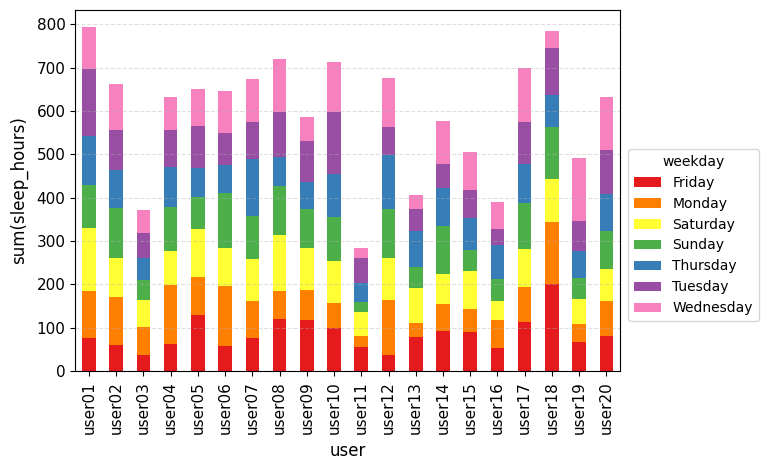

In [15]:
# Still works without a title
cm.bar(x='user', y='sleep_hours', group_by='weekday', legend='right')

### Automatic aggregation on the x axis

When a time variable is used on the x axis, the `x_period` parameter can be used to automatically group up the data into common time bands.

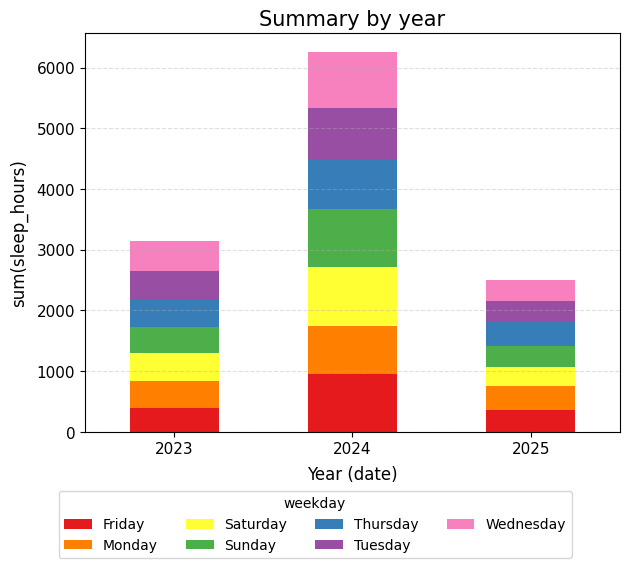

In [16]:
cm.bar(x='date', x_period='year', y='sleep_hours', group_by='weekday', 
       title='Summary by year', legend='bottom')

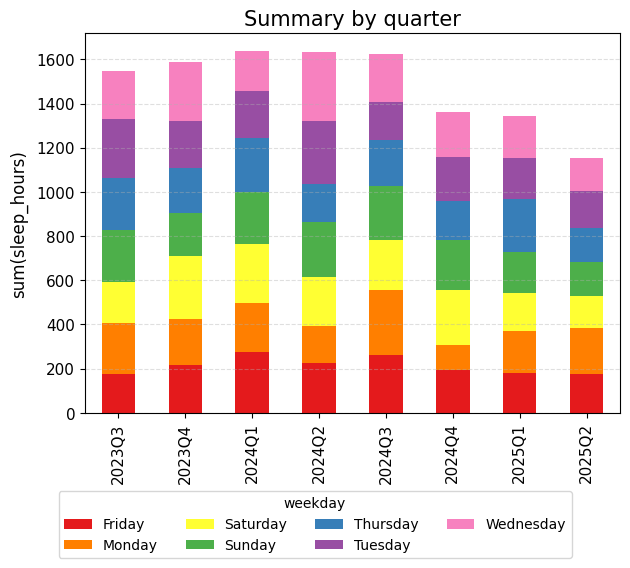

In [17]:
cm.bar(x='date', x_period='quarter', y='sleep_hours', group_by='weekday',
       title='Summary by quarter', legend='bottom', x_label='') # also shows how you can remove the default x_label value with ''

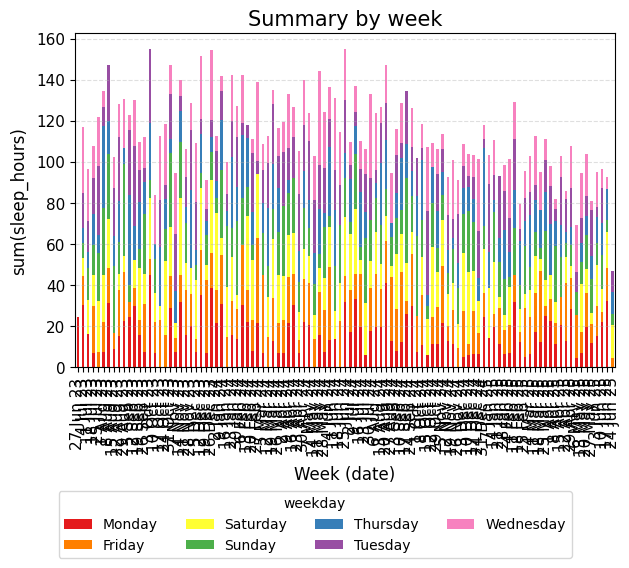

In [18]:
cm.bar(x='date', x_period='week', y='sleep_hours', group_by='weekday',
       title='Summary by week', legend='bottom')

note x_period='day' is also possible but not appropriate for this dataset

### Custom sort order

In addition to sorting x or group_by using 'labels' or 'values' and either ascending or descending, you can pass a custom sort order e.g. for categories that are ordinal but where you don't want to have to adjust the labels to have a numeric prefix just to get the sorting correct.

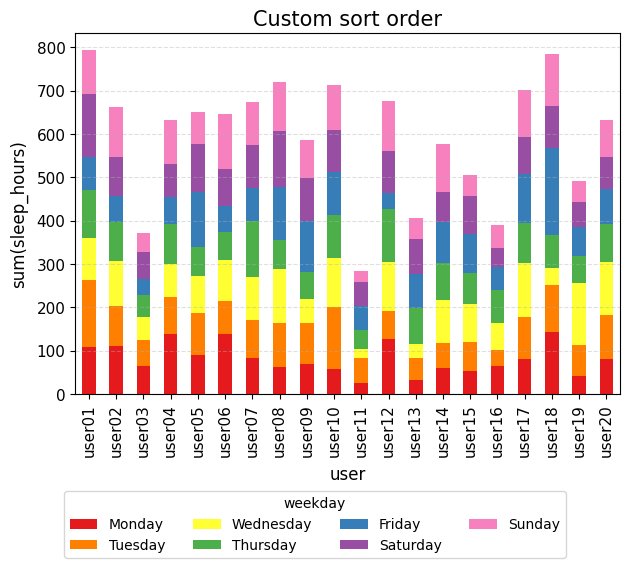

In [19]:
cm.bar(x='user', y='sleep_hours', group_by='weekday',
       title='Custom sort order', legend='bottom',
       sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Sticky arguments

These are turned off by default, but you can call `sticky()` to set arguments or use `sticky=True` to have all arguments within a chart call be remembered from one chart to the next

To reset this, call `sticky()` with no arguments.

In [20]:
# you can set the parameters in advanced
cm.sticky() # reset
cm.sticky(data=df, x='user', y='sleep_hours', group_by='weekday', 
          sort_x='label', sort_x_ascending=True) # add new arguments

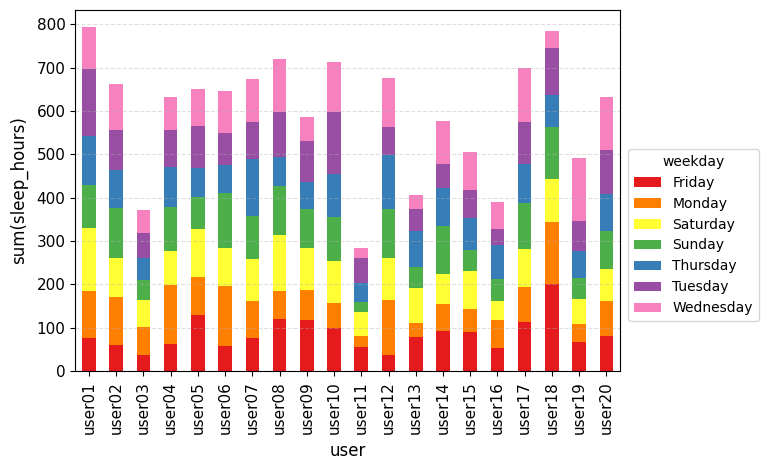

In [21]:
# all arguments passed above are being remembered
cm.bar()

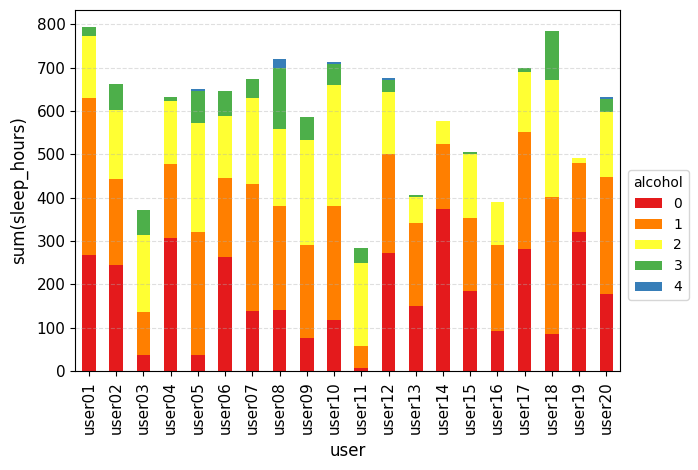

In [22]:
# no need to pass data, x, y etc. it gets remembred. can also use sticky=True to remember subsequent adjustments to the parameters.
cm.bar(group_by='alcohol', sort_group_by='label', sticky=True)

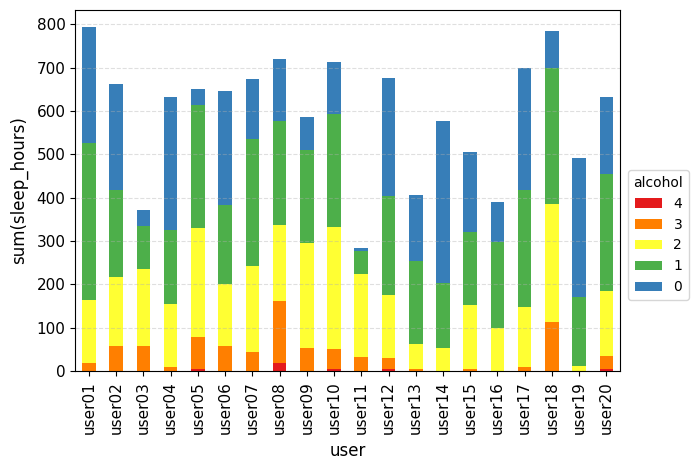

In [23]:
cm.bar(sort_group_by_ascending=False)

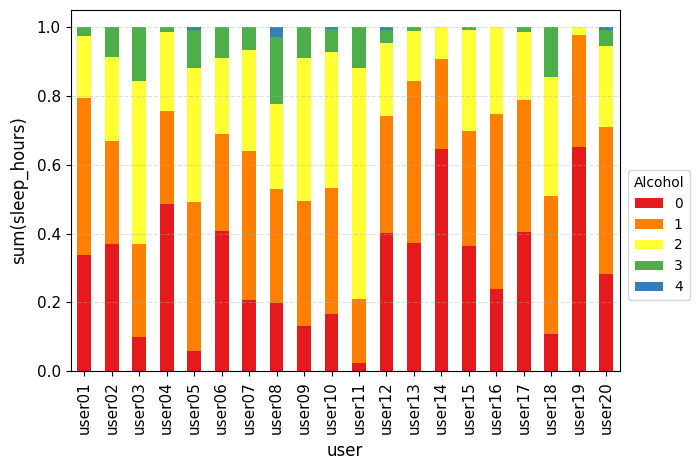

In [24]:
cm.bar(stacking='proportion', legend_label='Alcohol')

In [27]:
# call with no parameters to reset the sticky arguments when done
cm.sticky()
cm.sticky(data=df)

### Palettes

The palette can be set using a hex color list, or the 'rainbow' and 'colorblind' presets. 

This can be done when you instantiate the ChartMonkey object using `palette` or afterwards using e.g. `cm.apply_palette(palette='colorblind')`.

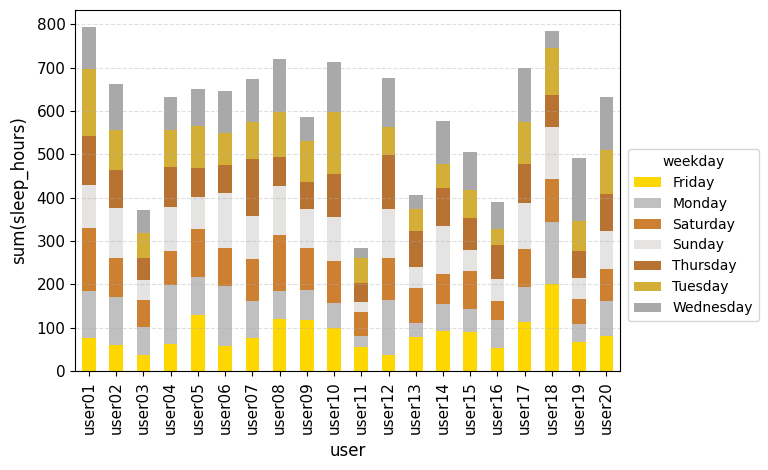

In [28]:
METALLIC_PALETTE = [
    '#FFD700',  # Gold
    '#C0C0C0',  # Silver
    '#CD7F32',  # Bronze
    '#E5E4E2',  # Platinum
    '#B87333',  # Copper
    '#D4AF37',  # Metallic Gold (Deep)
    '#A9A9A9',  # Gunmetal Gray
    '#B0C4DE',  # Steel Blue
    '#DA8A67',  # Rose Gold
    '#8C7853'   # Brass
]

# set palette when instantiating the class, using a list of hex values
custom_cm = ChartMonkey(palette=METALLIC_PALETTE)
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday')

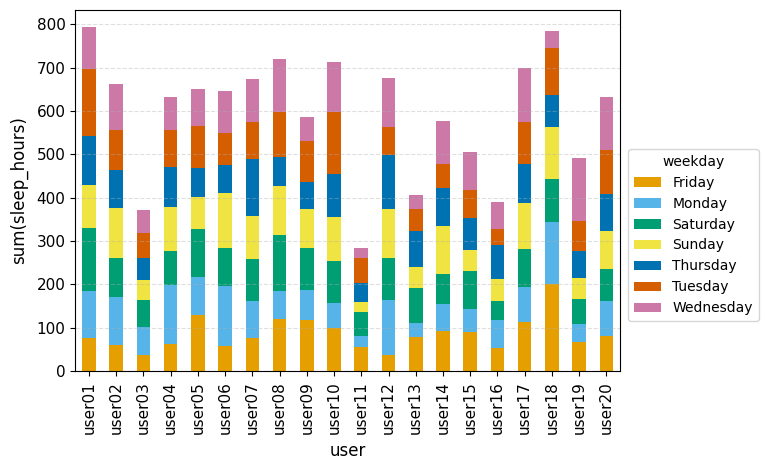

In [29]:
# set palette using the set_palette method
custom_cm.set_palette(palette='colorblind')
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday')

You can also pass a chart-specific palette

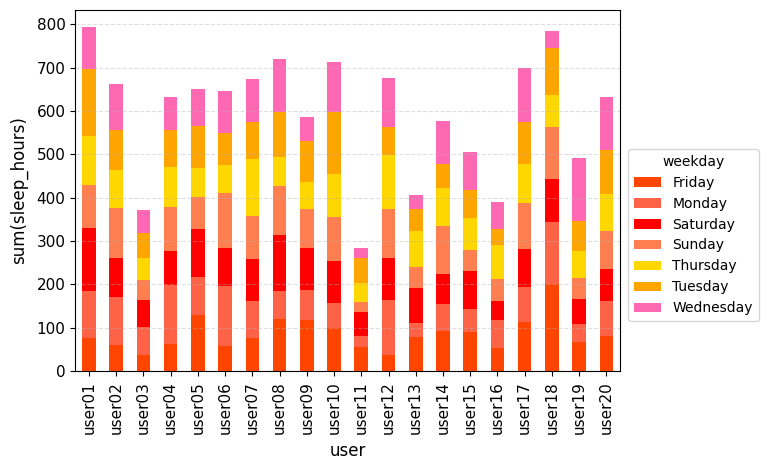

In [30]:
HOT_PALETTE = [
    '#FF4500',  # Orange Red
    '#FF6347',  # Tomato
    '#FF0000',  # Red
    '#FF7F50',  # Coral
    '#FFD700',  # Bright Yellow
    '#FFA500',  # Orange
    '#FF69B4',  # Hot Pink
    '#FF1493',  # Deep Pink
    '#8B0000',  # Dark Red
    '#4B0000'   # Blackened Brown
]

custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', palette=HOT_PALETTE)

You can also use a label-linked palette lookup. This ensures the same colours are used for the same categories in different charts, even if the data changes, without the need to wrangle and sort. This will be combined with any fixed palette (including presets) to "fill in the gaps", with a "fallback" palette being used after that.

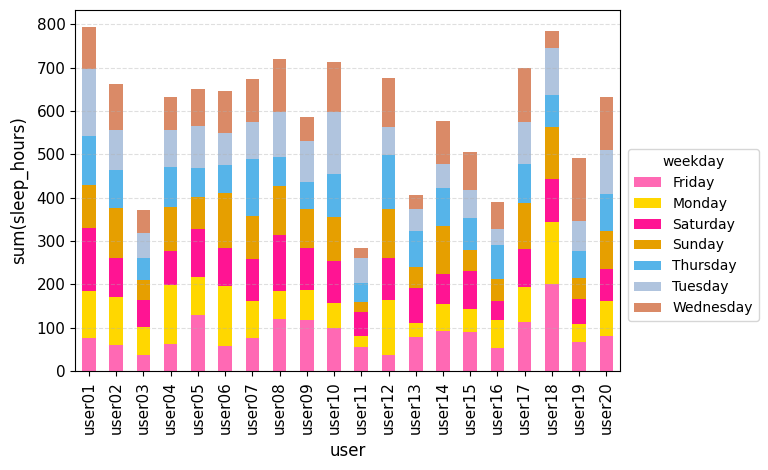

In [31]:
# These days should always have these colours
palette_map = {
    'Monday': METALLIC_PALETTE[0],    # Gold 
    'Tuesday': METALLIC_PALETTE[7],   # Steel Blue
    'Wednesday': METALLIC_PALETTE[8]  # Rose Gold
}

# The next two days on the list that aren't in the above dict will be pink
fixed_palette = [HOT_PALETTE[6], HOT_PALETTE[7]]   # shades of pink

custom_cm.bar(data=df,
              x='user', y='sleep_hours', group_by='weekday',
              palette=fixed_palette, palette_map=palette_map)

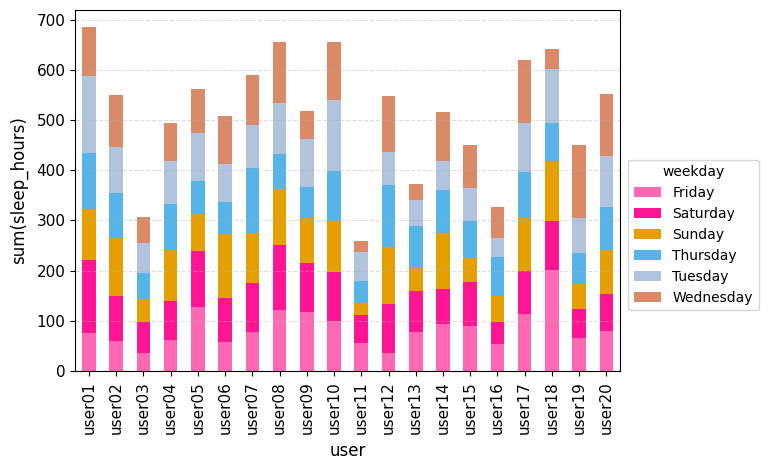

In [32]:
custom_cm.bar(data=df[df['weekday'] != 'Monday'],
              x='user', y='sleep_hours', group_by='weekday',
              palette=fixed_palette, palette_map=palette_map,
              sort_group_by_ascending=True)

### Frequency charts

If you don't pass a value to sum based on, you will get a count by default

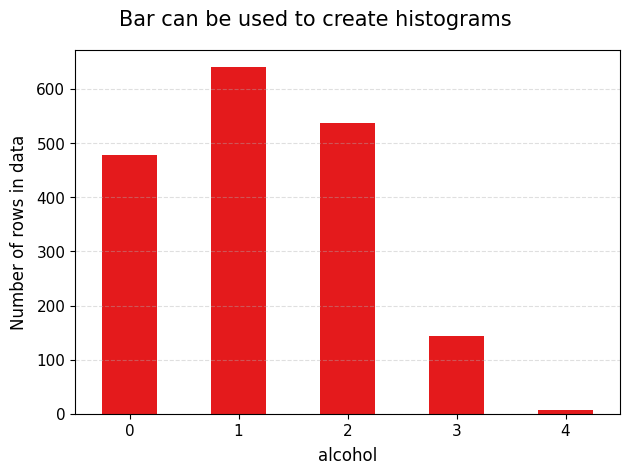

In [31]:
cm.bar(x='alcohol', title='Bar can be used to create histograms')

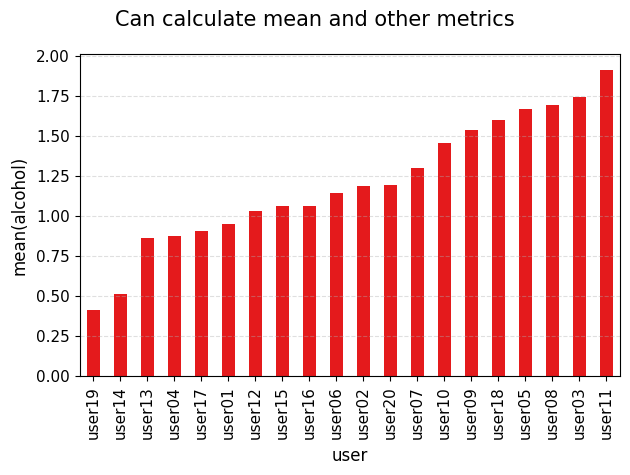

In [33]:
cm.bar(x='user', y='alcohol', title='Can calculate mean and other metrics', aggfunc='mean', sort_x='value')

### Benchmark / Target lines

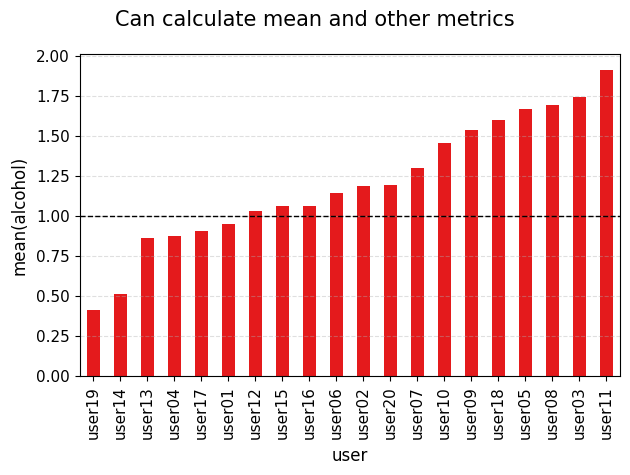

In [34]:
cm.bar(x='user', y='alcohol', title='Can calculate mean and other metrics', aggfunc='mean', sort_x='value',
       target_y = 1.0)

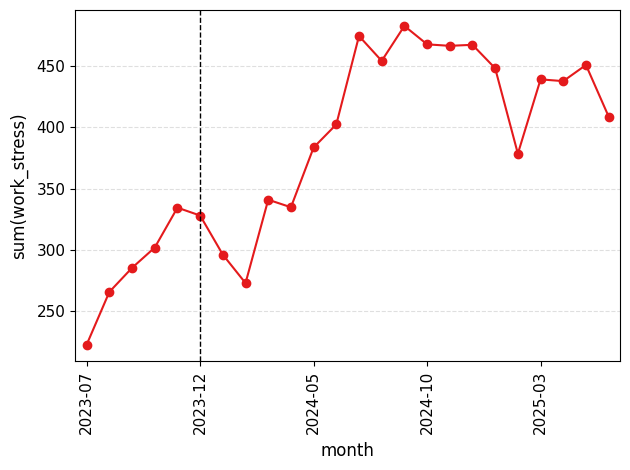

In [35]:
# TODO: figure out how to handle x targets with categorical x values
cm.line(x='month', y='work_stress', target_x='2023-12')

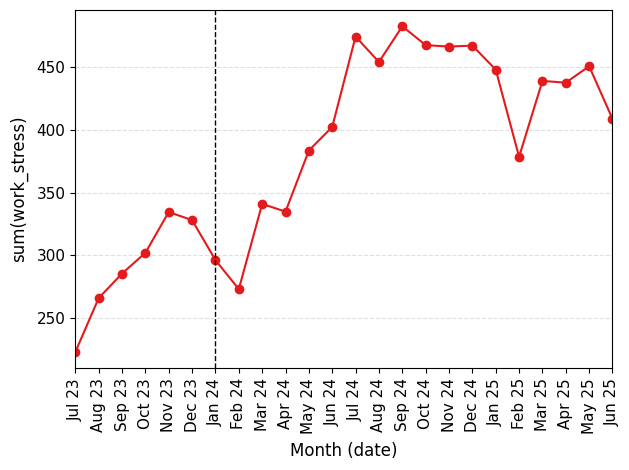

In [36]:
# TODO: figure out how to handle x targets with categorical x values
cm.line(x='date', x_period='month', y='work_stress', x_min='01-Jul-2023', target_x='01-Jan-2024')

### Different font presets

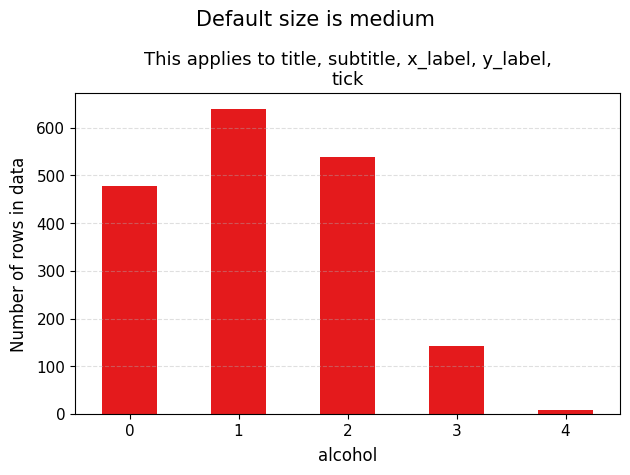

In [37]:
cm.bar(x='alcohol', title='Default size is medium', subtitle='This applies to title, subtitle, x_label, y_label, tick')

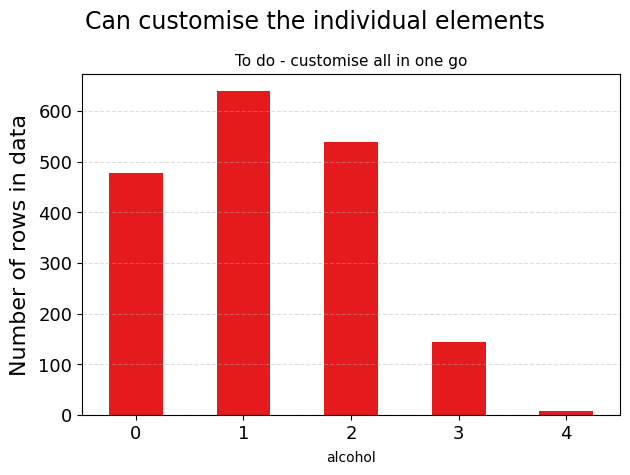

In [38]:
cm.bar(x='alcohol', title='Can customise the individual elements', subtitle='To do - customise all in one go',
       title_size='large', subtitle_size='small', x_label_size='small', y_label_size='x-large', tick_size='large')

### Label remapping

We should be able to remap labels and this shouldn't adversely impact sorting

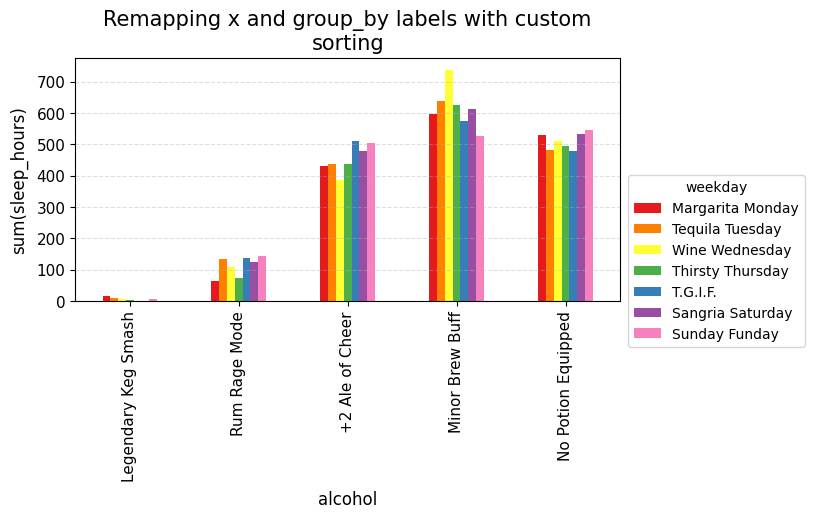

In [39]:
cm.bar(x='alcohol', y='sleep_hours', group_by='weekday',
       title='Remapping x and group_by labels with custom sorting', stacking='none',
       label_map = {
            "Monday": "Margarita Monday",
            "Tuesday": "Tequila Tuesday",
            "Wednesday": "Wine Wednesday",
            "Thursday": "Thirsty Thursday",
            "Friday": "T.G.I.F.",
            "Saturday": "Sangria Saturday",
            "Sunday": "Sunday Funday",
            0: "No Potion Equipped",
            1: "Minor Brew Buff",
            2: "+2 Ale of Cheer",
            3: "Rum Rage Mode",
            4: "Legendary Keg Smash",
            5: "Boss-Level Hangover"
       },
       sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
       sort_x='labels',
       sort_x_ascending=False
)

### Pie charts

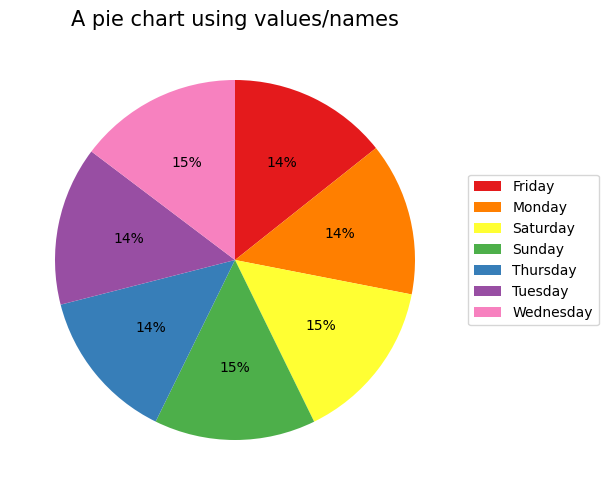

In [22]:
# with values and names
cm.pie(values='sleep_hours', names='weekday', title='A pie chart using values/names')

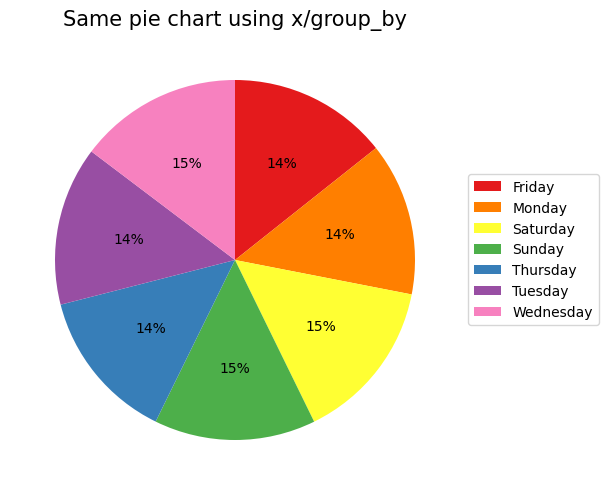

In [23]:
# with x and group_by
cm.pie(x='sleep_hours', group_by='weekday', title='Same pie chart using x/group_by')

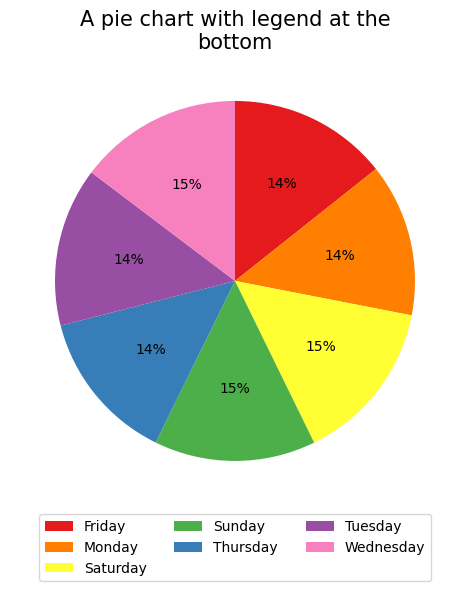

In [24]:
# legend on right
cm.pie(x='sleep_hours', group_by='weekday', title='A pie chart with legend at the bottom', legend='bottom')

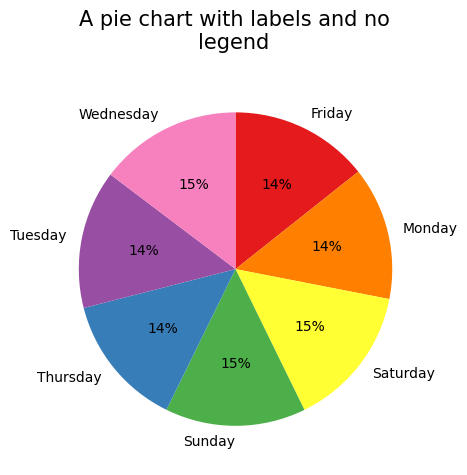

In [25]:
# with labels on slices
cm.pie(x='sleep_hours', group_by='weekday', title='A pie chart with labels and no legend', legend='none', show_labels=True)

### Line charts

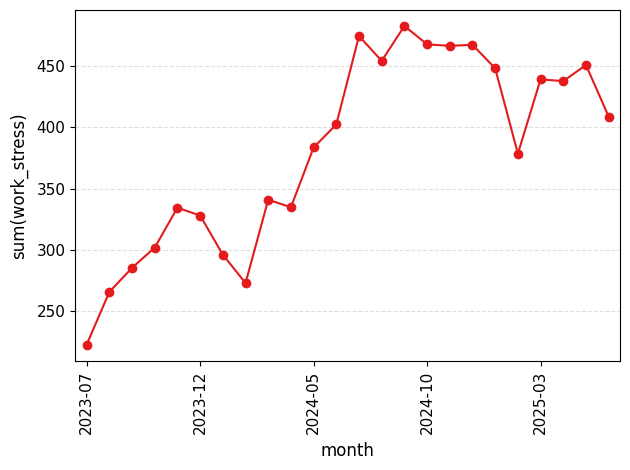

In [8]:
# categorical numeric x
cm.line(x='month', y='work_stress')

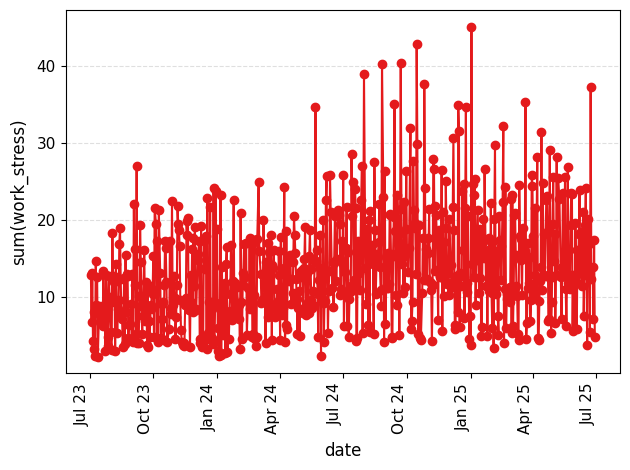

In [47]:
# datetime x with no x_period aggregation
cm.line(x='date', y='work_stress')

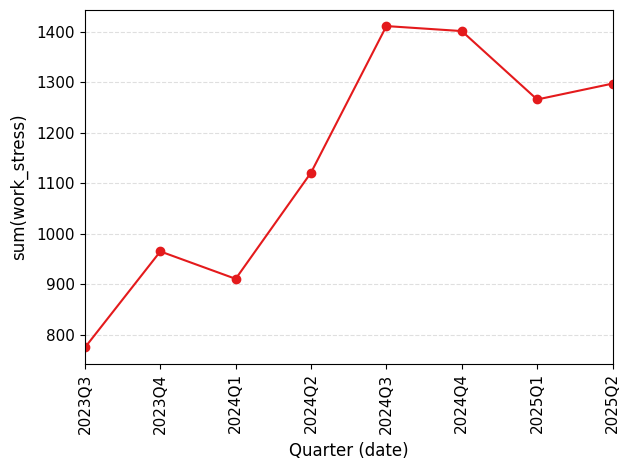

In [48]:
# datetime x with x_period aggregation
cm.line(x='date', y='work_stress', x_period='quarter')

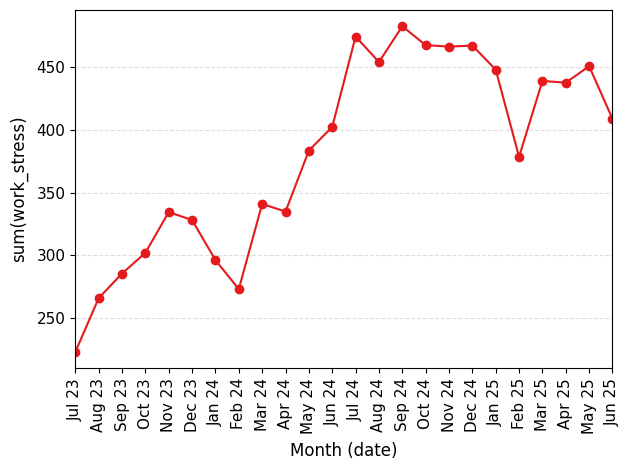

In [49]:
cm.line(x='date', y='work_stress', x_period='month')

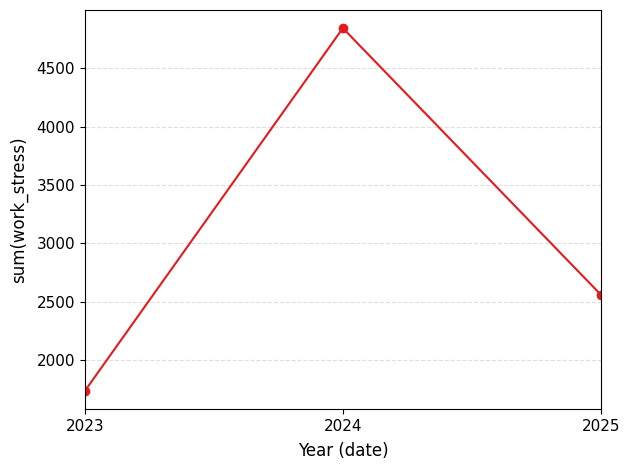

In [50]:
cm.line(x='date', y='work_stress', x_period='year')

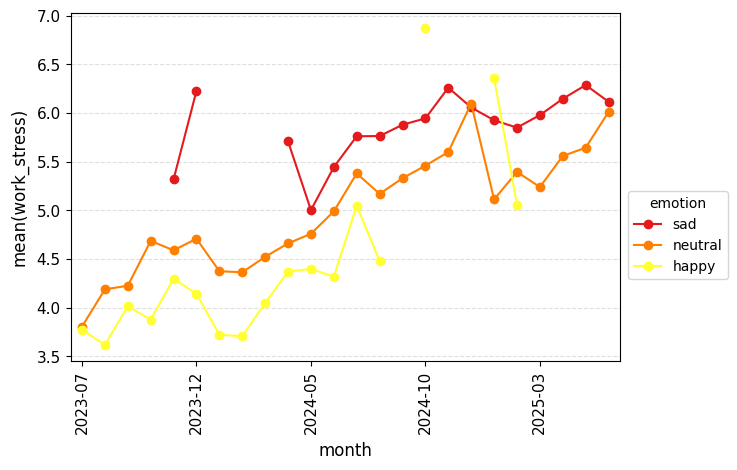

In [51]:
# multiple series with group_by
cm.line(x='month', y='work_stress', group_by='emotion',
        aggfunc='mean')

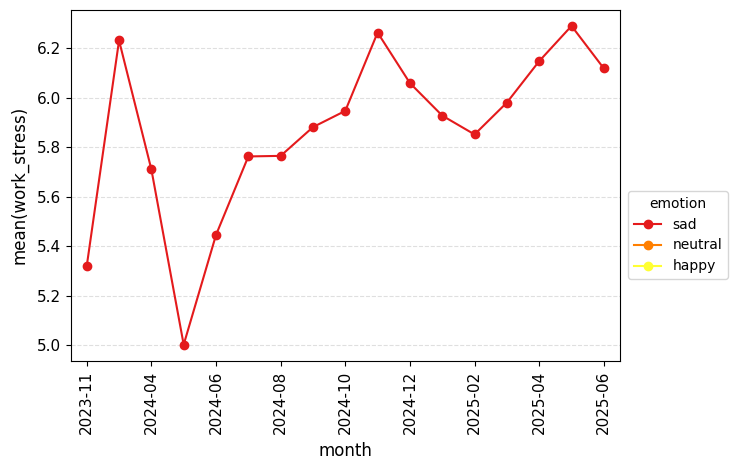

In [52]:
# check missing values don't collapse x axes when there aren't other series to support it
cm.line(data=df[df['emotion'] == 'sad'], x='month', y='work_stress', group_by='emotion', aggfunc='mean')

In [53]:
# check what happens if we pass a group_by list - as expected, this fails at present, but perhaps in future we can implement a cross
if False:
    cm.line(x='month', y='work_stress', group_by=['emotion', 'mindset'])

### Post processing

The default behaviour is to show the plot and return None to suppress other cell outputs. Pass show_plot=False to instead return fig, ax for post processing.

In [54]:
# TODO: update
if False:
    fig, ax = sticky.hist(data=df, x='work_stress', show_plot=False)

    # Example: Add a custom annotation to the plot
    ax.annotate(
        'Peak stress here!',
        xy=(9, 25), # point to annotate (arrow tip), in data coordinates
        xytext=(9, 30), # location of the annotation text, in data coordinates
        arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
        fontsize=12, color='red' # text style
    )

    # Example: Add a watermark
    fig.text(0.8, 0.9, 'Confidential', ha='center', va='center', fontsize=16, color='gray', alpha=0.5)

    # Example: Save the figure with a custom DPI and tight bounding box
    fig.savefig('demo_save.png', dpi=300, bbox_inches='tight')

### Compare chart

Note to self - need to articulate why this chart type is superior to just using subplots...
* Can compare different chart types / datasets / definitions within the one plot with minimal effort
* Clean figure aspects such as shared legend

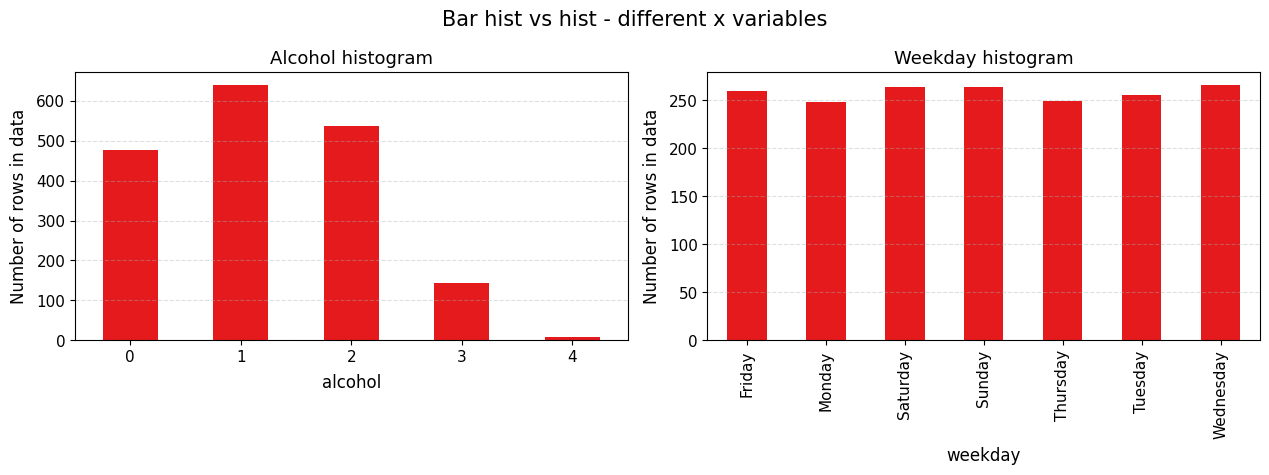

In [5]:
# Bar hist (count) vs bar hist (count) - different x variables
cm.compare(cm.chart.bar(x='alcohol', subtitle='Alcohol histogram'),
           cm.chart.bar(x='weekday', subtitle='Weekday histogram'),
           title='Bar hist vs hist - different x variables')

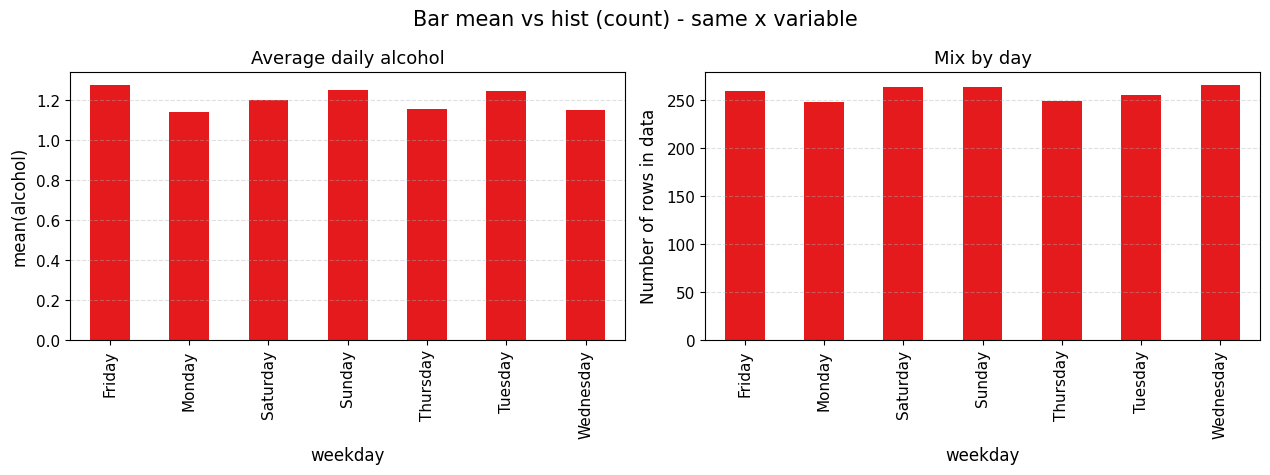

In [6]:
# Bar mean vs Bar hist (count) - same x variables
cm.compare(cm.chart.bar(x='weekday', y='alcohol', aggfunc='mean', subtitle='Average daily alcohol'),
           cm.chart.bar(x='weekday', subtitle='Mix by day'),
           title='Bar mean vs hist (count) - same x variable')

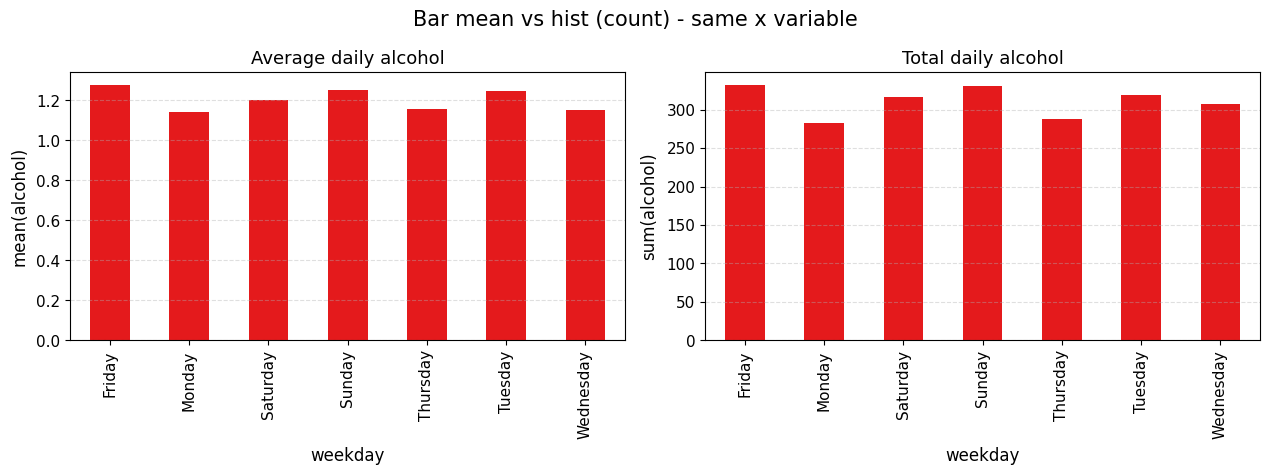

In [7]:
# Bar mean vs Bar sum
cm.compare(cm.chart.bar(x='weekday', y='alcohol', aggfunc='mean', subtitle='Average daily alcohol'),
           cm.chart.bar(x='weekday', y='alcohol', aggfunc='sum', subtitle='Total daily alcohol'),
           title='Bar mean vs hist (count) - same x variable')

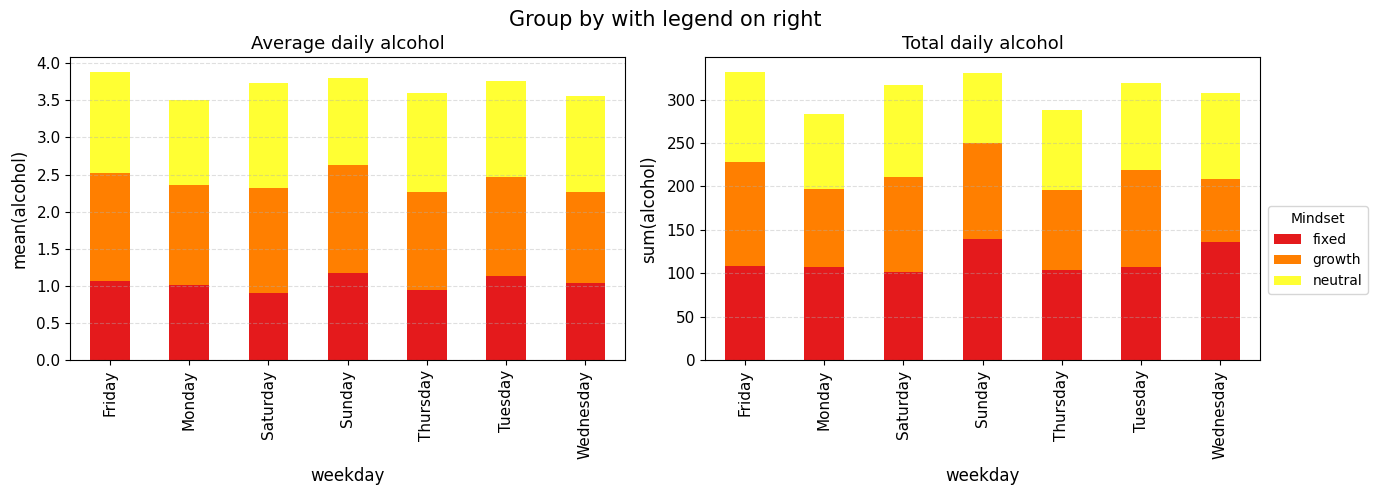

In [8]:
# Stacked bar vs Bar hist - group_by applies to both
cm.compare(cm.chart.bar(x='weekday', y='alcohol', aggfunc='mean', group_by='mindset', subtitle='Average daily alcohol'),
           cm.chart.bar(x='weekday', y='alcohol', aggfunc='sum', group_by='mindset', subtitle='Total daily alcohol'),
           title='Group by with legend on right', legend_title='Mindset')

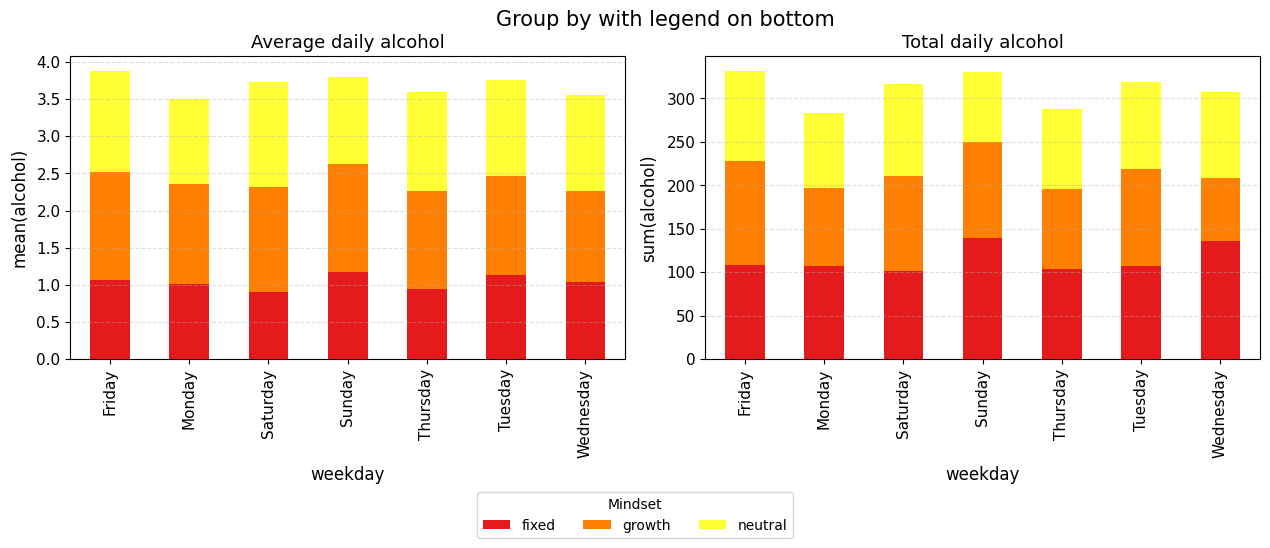

In [9]:
# legend at the bottom
cm.compare(cm.chart.bar(x='weekday', y='alcohol', aggfunc='mean', group_by='mindset', subtitle='Average daily alcohol'),
           cm.chart.bar(x='weekday', y='alcohol', aggfunc='sum', group_by='mindset', subtitle='Total daily alcohol'),
           title='Group by with legend on bottom', legend='bottom', legend_title='Mindset')

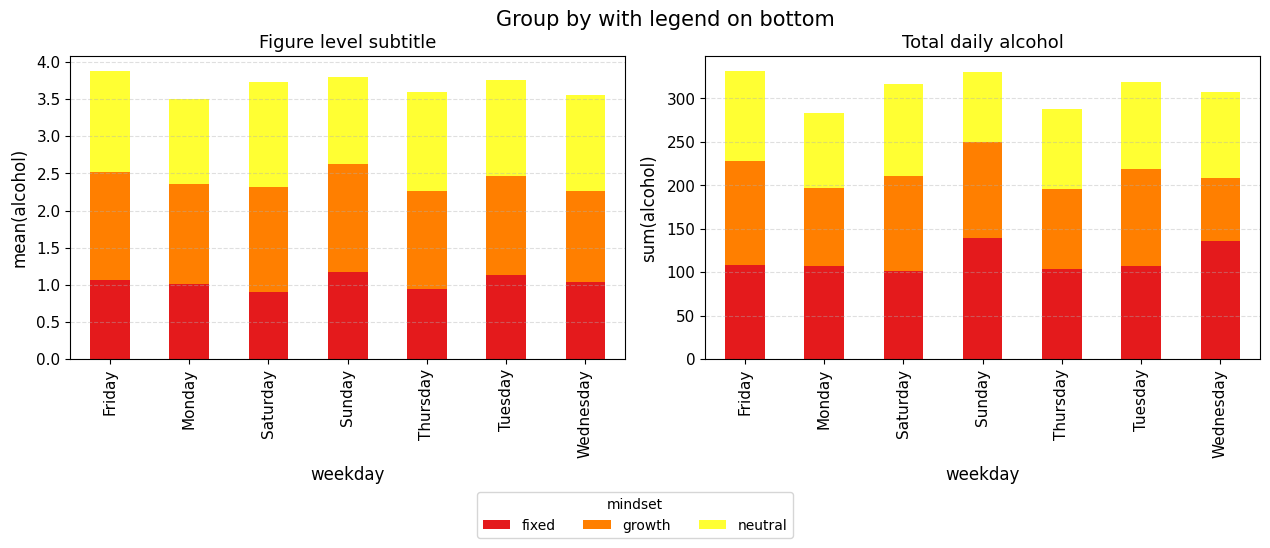

In [10]:
# Compare level arguments
cm.compare(cm.chart.bar(aggfunc='mean', subtitle='Average daily alcohol'),
           cm.chart.bar(aggfunc='sum', subtitle='Total daily alcohol'),
           title='Group by with legend on bottom', subtitle='Figure level subtitle', legend='bottom',
           x='weekday', y='alcohol', group_by='mindset')

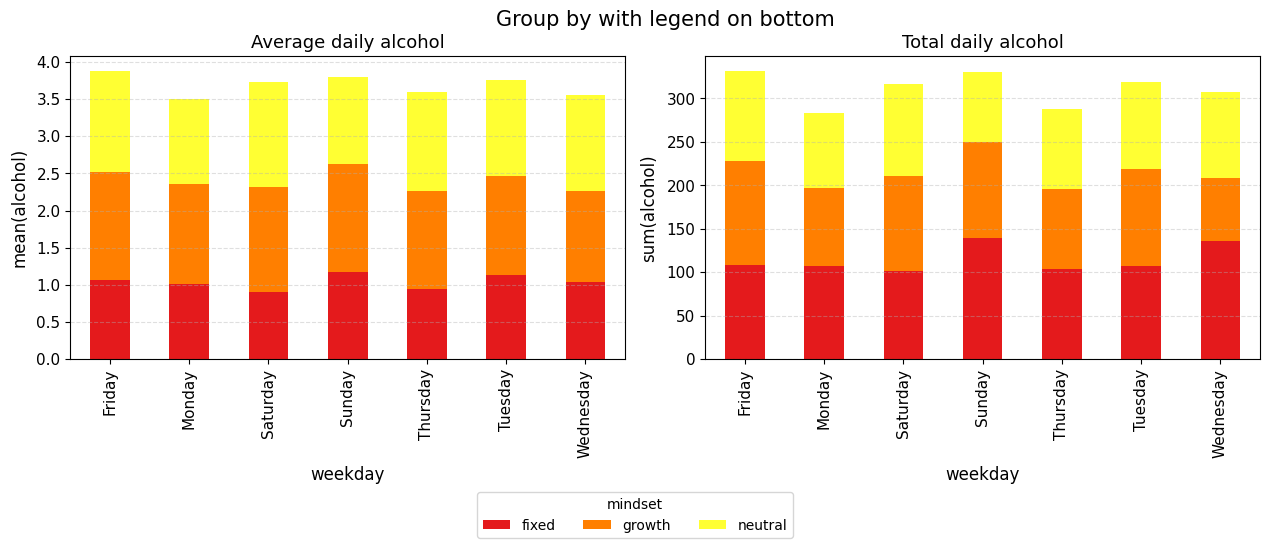

In [11]:
# Compare level arguments before the chart definition
cm.compare(title='Group by with legend on bottom',
           x='weekday', y='alcohol', group_by='mindset',
           chart1=cm.chart.bar(aggfunc='mean', subtitle='Average daily alcohol'),
           chart2=cm.chart.bar(aggfunc='sum', subtitle='Total daily alcohol'),
           legend='bottom')

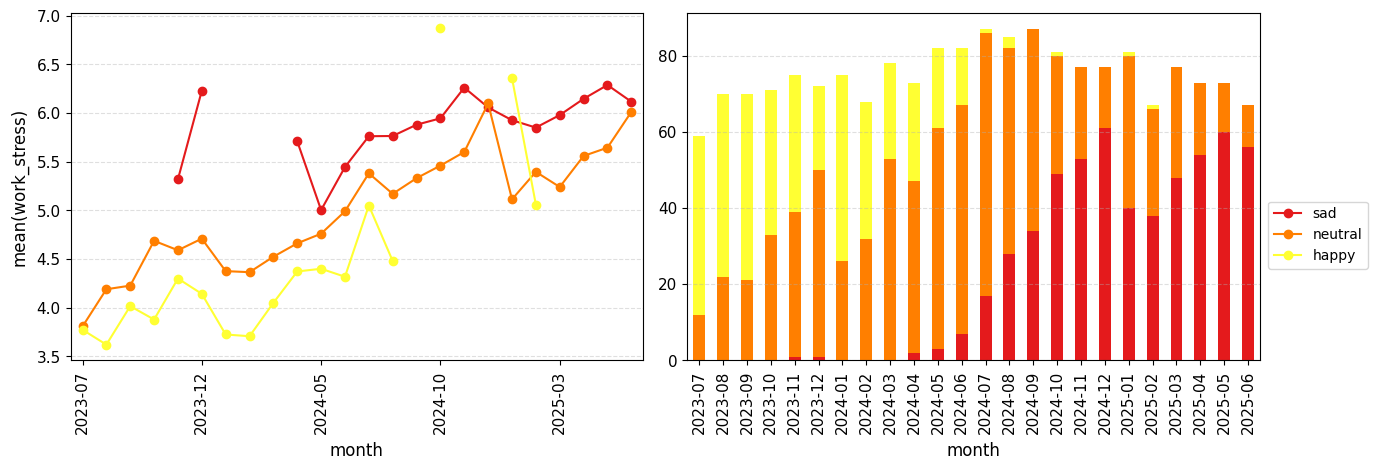

In [12]:
# Line (mean) vs Bar hist (count)
cm.compare(cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           cm.chart.bar(x='month', group_by='emotion'))

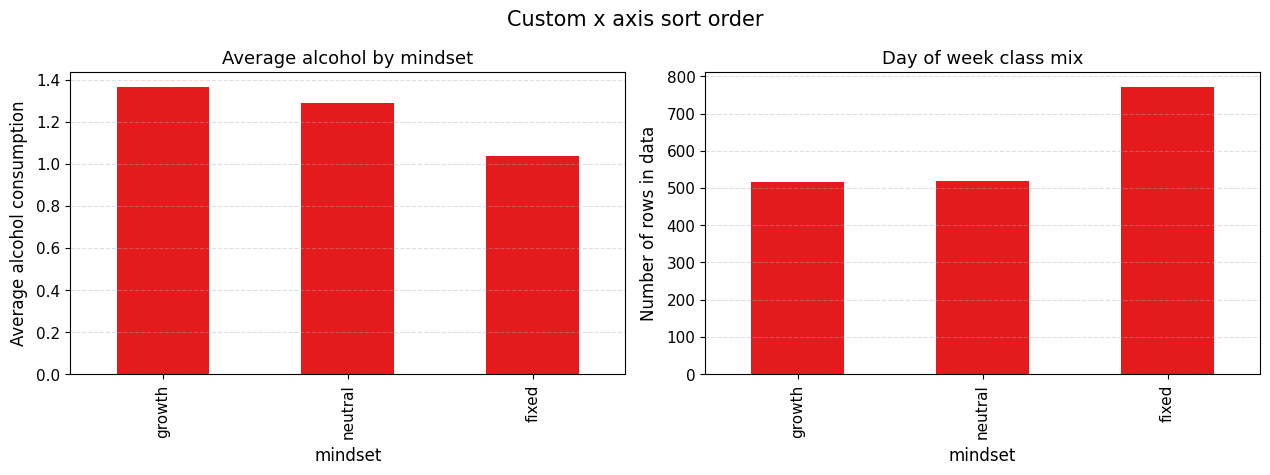

In [13]:
# custom x axis sort order
order=['growth', 'neutral', 'fixed']
cm.compare(cm.chart.bar(subtitle='Average alcohol by mindset',
                        x='mindset', y='alcohol', aggfunc='mean',
                        y_label='Average alcohol consumption',
                        sort_x=order
                        ),
           cm.chart.bar(subtitle='Day of week class mix',
                        x='mindset',
                        sort_x=order
                        ),
           title='Custom x axis sort order')

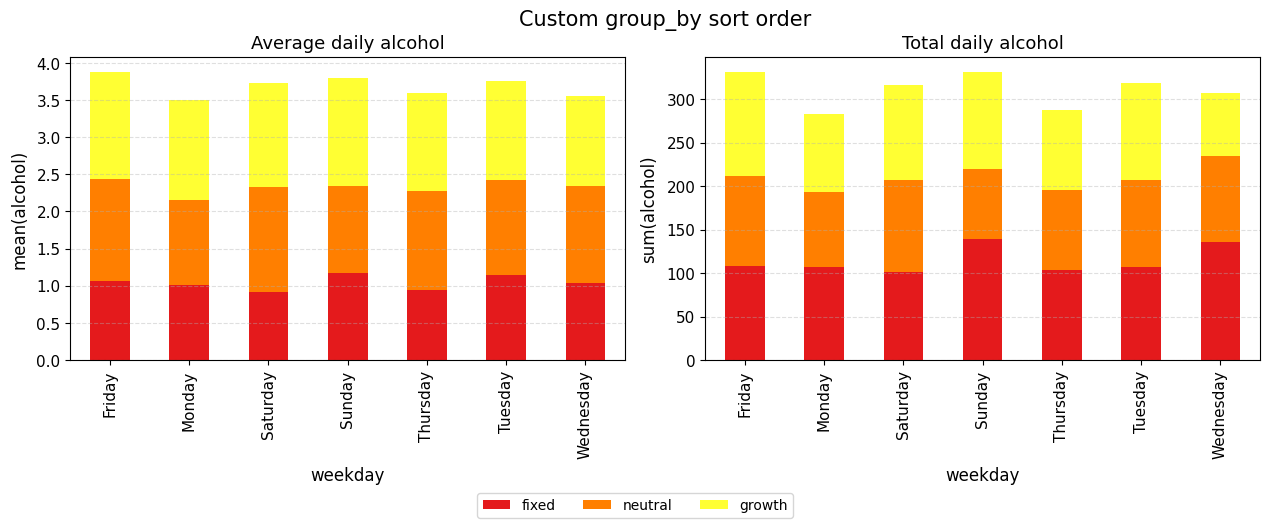

In [14]:
# custom group_by sort order
order=['growth', 'neutral', 'fixed']
order=['fixed', 'neutral', 'growth']
cm.compare(cm.chart.bar(x='weekday', y='alcohol', aggfunc='mean', group_by='mindset', 
                        subtitle='Average daily alcohol', sort_group_by=order),
           cm.chart.bar(x='weekday', y='alcohol', aggfunc='sum', group_by='mindset',
                        subtitle='Total daily alcohol', sort_group_by=order),
           title='Custom group_by sort order', legend='bottom')

In [15]:
# error message when you try and pass cm.bar instead of cm.chart.bar to a cm.compare
if False:
    cm.compare(cm.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
            cm.bar(x='month', group_by='emotion'))
    # confirmed displays TypeError: compare(...): `chart1` must be built with cm.chart.<kind>(...). You passed NoneType. Use cm.chart.bar(...) not cm.bar(...).

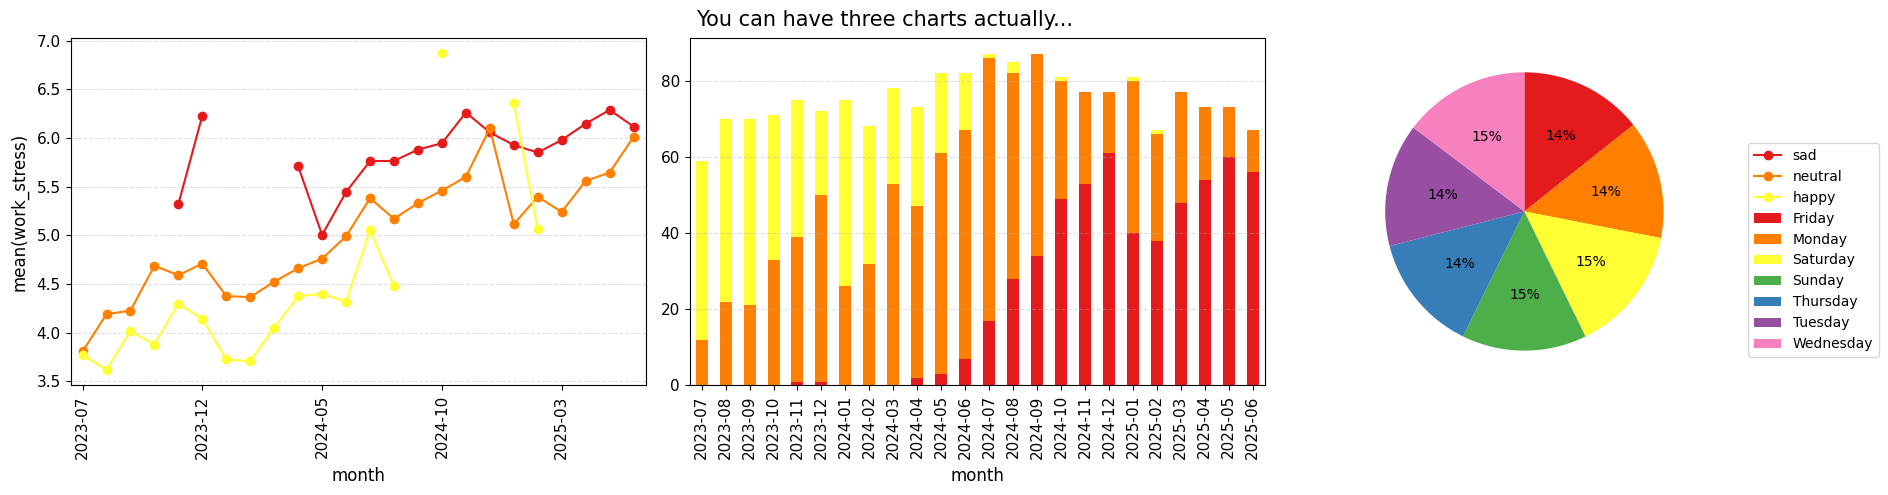

In [16]:
cm.compare(title='You can have three charts actually...', 
           chart1=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart2=cm.chart.bar(x='month', group_by='emotion'),
           chart3=cm.chart.pie(x='sleep_hours', group_by='weekday'))

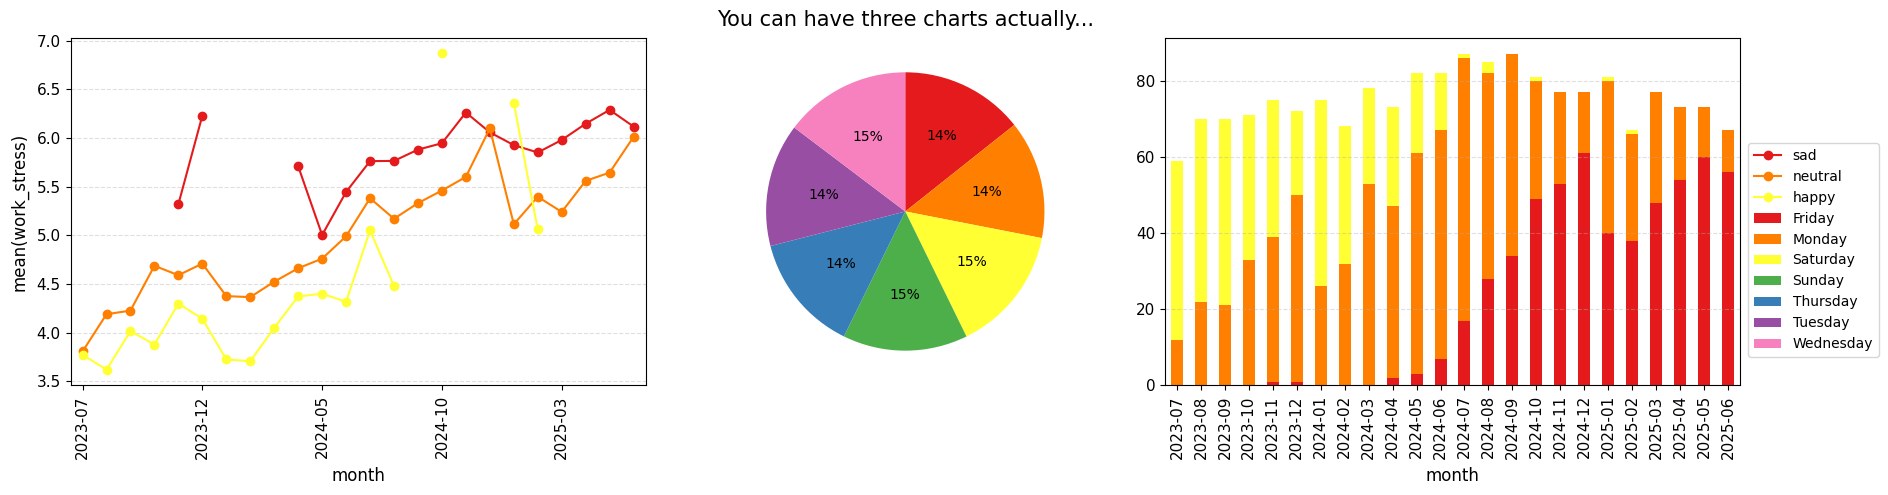

In [17]:
cm.compare(title='You can have three charts actually...', 
           chart1=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart3=cm.chart.bar(x='month', group_by='emotion'),
           chart2=cm.chart.pie(x='sleep_hours', group_by='weekday'))

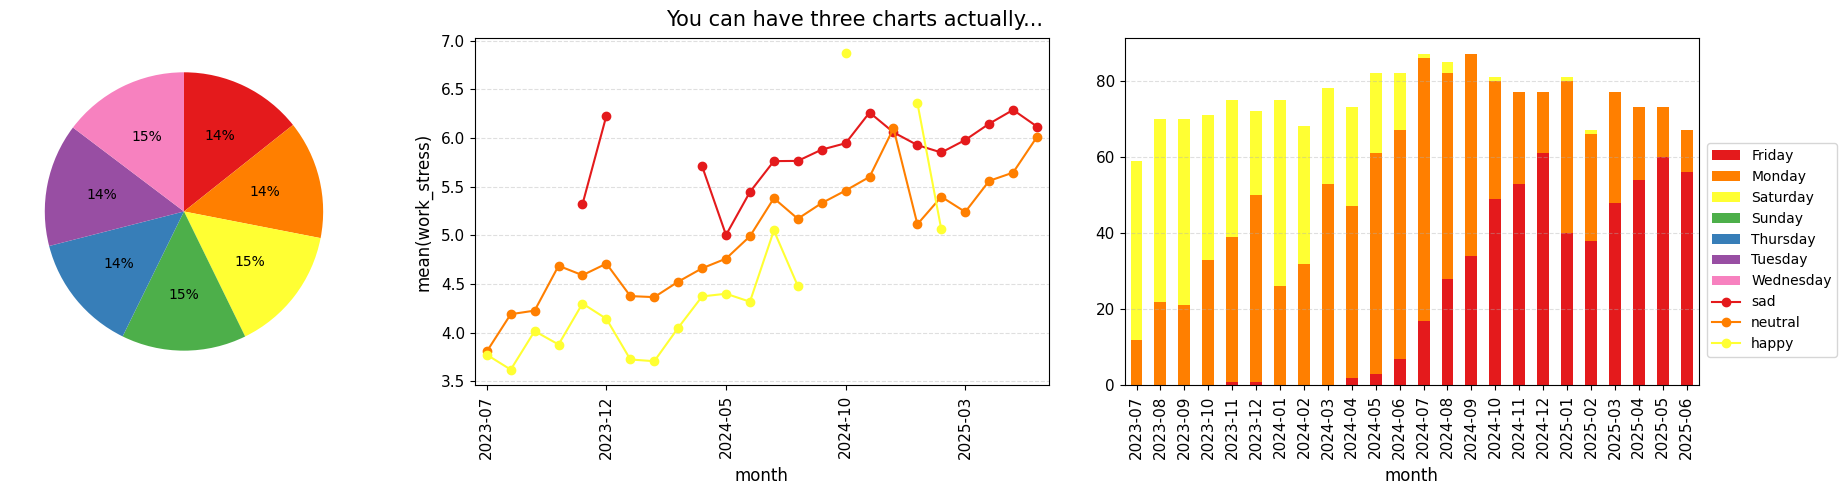

In [18]:
cm.compare(title='You can have three charts actually...', 
           chart2=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart3=cm.chart.bar(x='month', group_by='emotion'),
           chart1=cm.chart.pie(x='sleep_hours', group_by='weekday'))

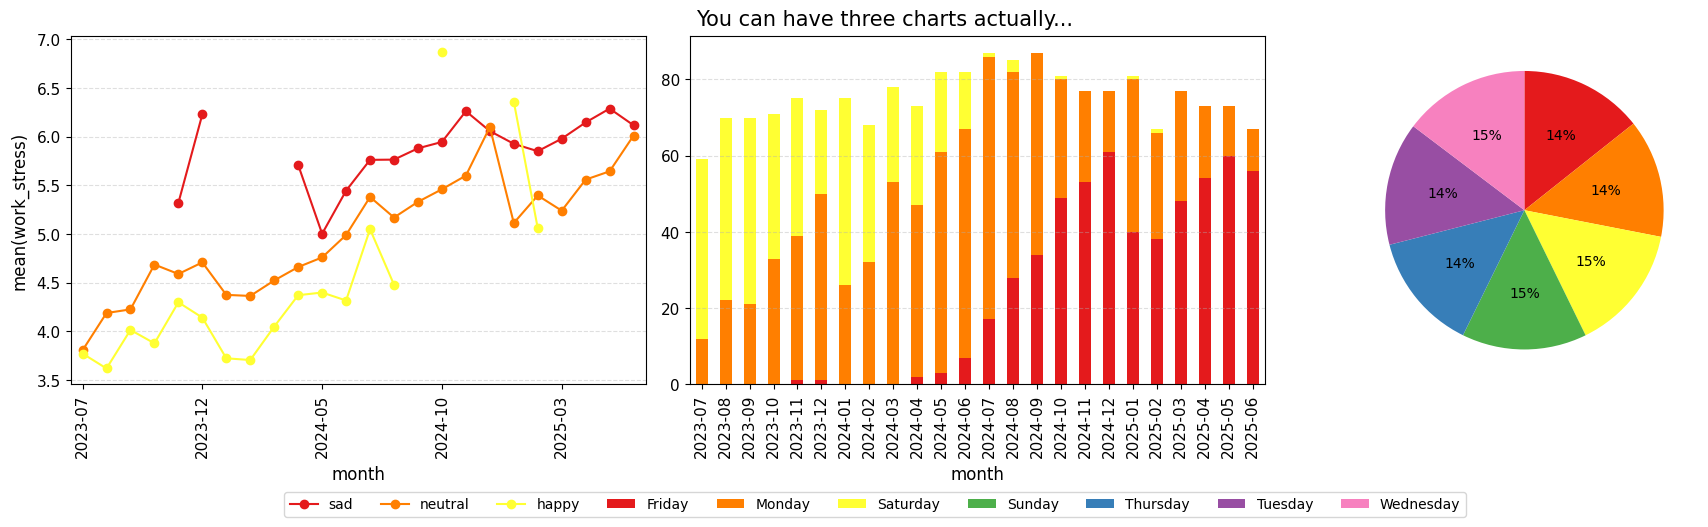

In [19]:
cm.compare(title='You can have three charts actually...', 
           chart1=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart2=cm.chart.bar(x='month', group_by='emotion'),
           chart3=cm.chart.pie(x='sleep_hours', group_by='weekday'), legend='bottom')

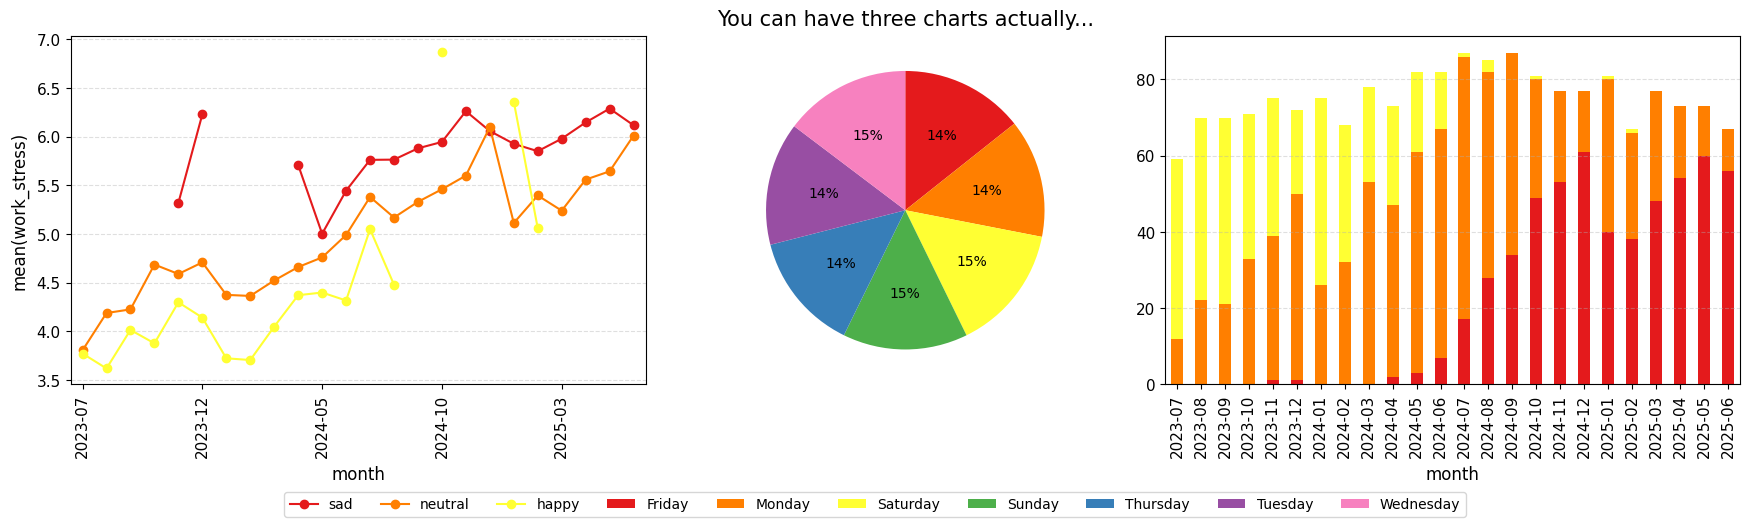

In [20]:
cm.compare(title='You can have three charts actually...', 
           chart1=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart3=cm.chart.bar(x='month', group_by='emotion'),
           chart2=cm.chart.pie(x='sleep_hours', group_by='weekday'), legend='bottom')

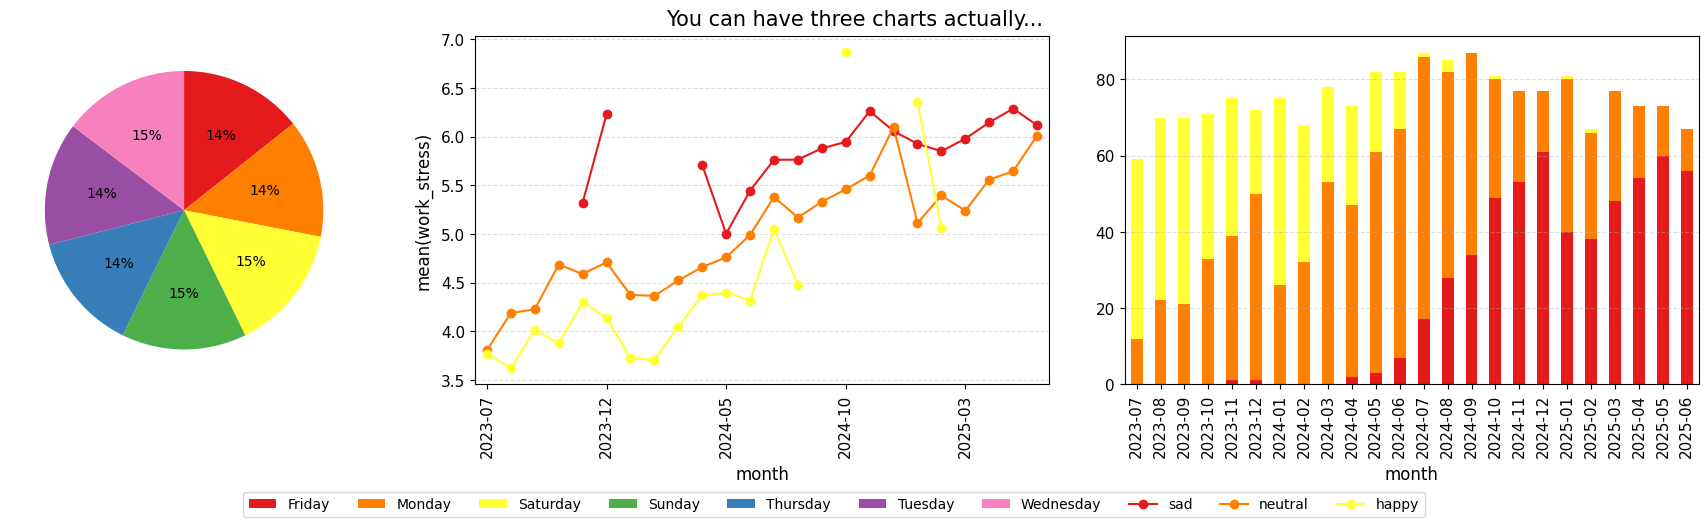

In [21]:
cm.compare(title='You can have three charts actually...', 
           chart2=cm.chart.line(x='month', y='work_stress', group_by='emotion', aggfunc='mean'),
           chart3=cm.chart.bar(x='month', group_by='emotion'),
           chart1=cm.chart.pie(x='sleep_hours', group_by='weekday'), legend='bottom')

### Mix chart

A wrapper for compare() that assumes you want to provide the spec of the left chart, and then have the logical mix chart on the right side.

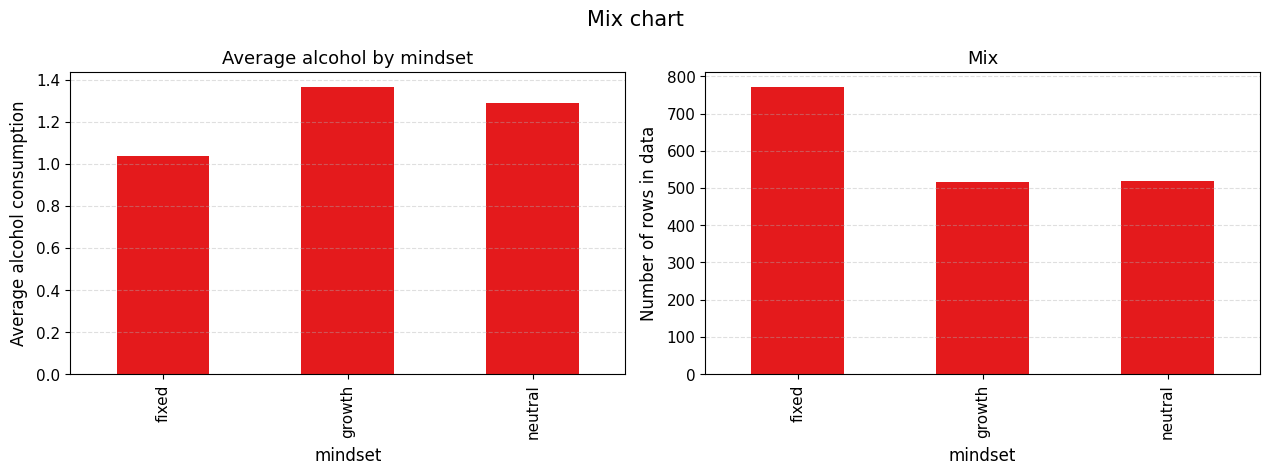

In [37]:
cm.mix(cm.chart.bar(subtitle='Average alcohol by mindset', x='mindset', y='alcohol', aggfunc='mean', y_label='Average alcohol consumption'), title='Mix chart')

Works with pie charts too

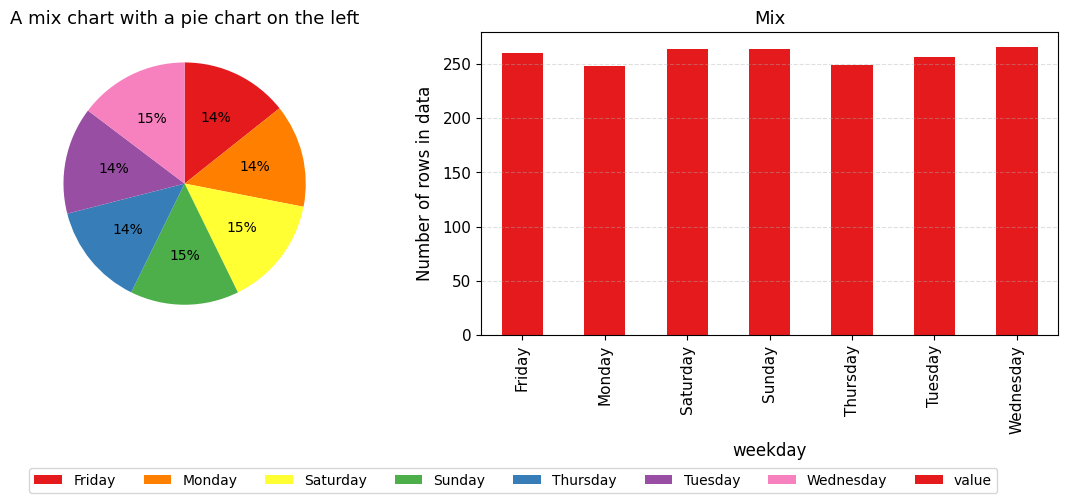

In [36]:
cm.mix(cm.chart.pie(subtitle='A mix chart with a pie chart on the left', x='sleep_hours', group_by='weekday'), legend='bottom')

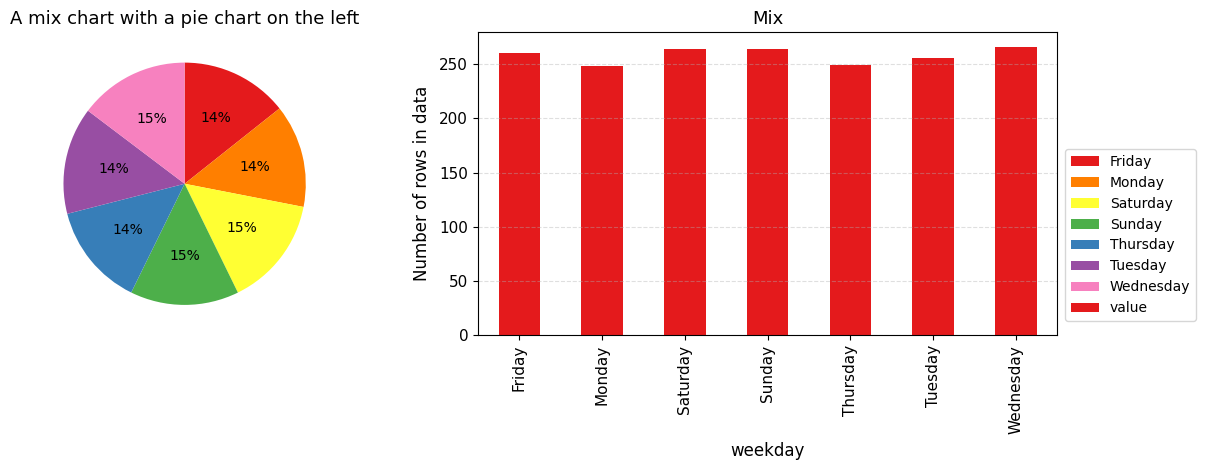

In [35]:
cm.mix(cm.chart.pie(subtitle='A mix chart with a pie chart on the left', x='sleep_hours', group_by='weekday'), legend='right')

and line charts

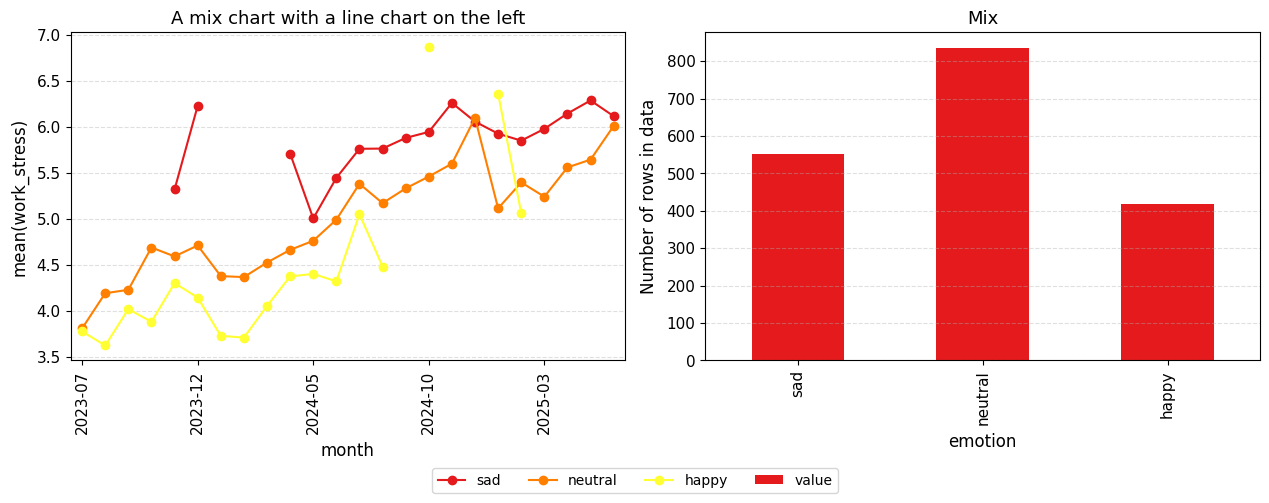

In [34]:
cm.mix(cm.chart.line(subtitle='A mix chart with a line chart on the left', x='month', y='work_stress', group_by='emotion', aggfunc='mean'), legend='bottom')

### Delay chart

In [8]:
df.date.min()

Timestamp('2023-07-03 00:00:00')

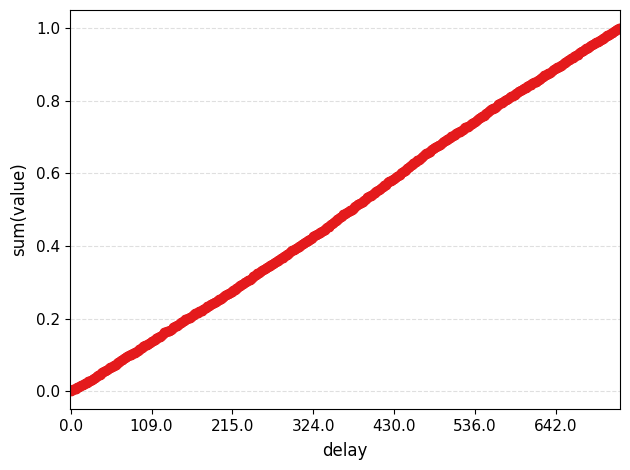

In [33]:
cm.delay(start=df.date.min(), end='date')

### Violin

TODO
* categorical x (optional?)
* y values (required)
* group_by ignored / x alias?